# 라이브러리, 데이터 불러오기

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rc('font',family='Gulim')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [3]:
cust = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/customer.csv', index_col=0)
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,C02,D01,D02,E01,A06,L00,L01,how_many_cop,online_friendly,cltv
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,1,0,0,0,0,0,4.0,0.000000,1.057668e+06
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,16,0,0,11,0,0,4.0,0.144231,2.016931e+07
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,0,1.0,0.000000,6.780768e+04
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,7,0,2,0,0,0,0,5.0,0.000000,9.581719e+05
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,1,0,0,0,0,0,2.0,0.000000,6.788530e+06


In [4]:
purchase_list = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/purchase_list.csv', index_col=0)
data4 = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/data4.csv', index_col=0)

In [5]:
cust.columns

Index(['cust', '연간구매금액2', '연간구매금액3', '연간구매금액6', '연간구매금액236', '유통평균주기',
       '제휴평균주기', 'Lpay평균주기', '총합평균주기', 'ma_fem_dv', 'ages', 'zon_hlv',
       'Top5상품', 'Top5상품금액', 'num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02',
       'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06',
       'L00', 'L01', 'how_many_cop', 'online_friendly', 'cltv'],
      dtype='object')

# 함수 정의
- find_good_k() : KMeans에서 응집도에 기반하여 적절한 클러스터의 개수를 찾기 위한 함수
- make_cluster_graph() : 유통사, 제휴사, LPAY 이용횟수로 3차원 공간에서 클러스터를 시각화하기 위한 함수
- visualize_silhouette() : KMeans에서 실루엣계수에 기반하여 적절한 클러스터의 개수를 찾기 위한 함수
- custom_kmeans() : 다양한 변수, 변수변환, 스케일링 환경을 이용하여 클러스터링 실험을 하기 위하여 만든 함수
- kmeans_heatmap() : 클러스터링 결과를 효과적으로 시각화 하기 위해 만든 함수

In [6]:
def find_good_k(df=None, k_min=1, k_max=19, init='k-means++', max_iter = 300, scaling = 'minmax', log = False):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
    
    if log == True:
        df = np.log1p(df)

    if scaling == 'minmax':
        scaler = MinMaxScaler()
    elif scaling == 'standard':
        scaler = StandardScaler()
    elif scaling == 'robust':
        scaler = RobustScaler()
    
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    
    x = [] # k가 몇개인지
    y = [] # 응집도가 몇인지

    for k in range(k_min, k_max) :
        kmeans = KMeans(n_clusters = k, init = init, max_iter = max_iter)
        kmeans.fit(scaled_df) #데이터를 넣어주세요

        x.append(k)
        y.append(kmeans.inertia_)

    plt.plot(x, y)

In [7]:
def make_cluster_graph(k=3, init='k-means++', max_iter = 300, view=(30,30), scaling = 'minmax', log = False):
    
    df = cust[['num_pur2','num_pur3','num_pur6']]
    
    if log == True:
        df = np.log1p(df)

    if scaling == 'minmax':
        scaler = MinMaxScaler()
    elif scaling == 'standard':
        scaler = StandardScaler()
    elif scaling == 'robust':
        scaler = RobustScaler()
    
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = ['num_pur2','num_pur3','num_pur6'])

    kmeans = KMeans(n_clusters = k, init = init, max_iter = max_iter)
    kmeans.fit(scaled_df[['num_pur2','num_pur3','num_pur6']])
    
    scaled_df['cluster_pur']=kmeans.labels_
    colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(k):
        marker_ind = scaled_df[scaled_df['cluster_pur']==i].index
        ax.scatter(scaled_df.loc[marker_ind, 'num_pur2'], scaled_df.loc[marker_ind, 'num_pur3'], scaled_df.loc[marker_ind, 'num_pur6'],  marker='o', s=15, cmap=colors[i])
    ax.view_init(20, -160)
    plt.show()

In [8]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features, max_iter=300): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [9]:
def custom_kmeans(data=None, features=None, exclude_col = [], k=5, init='k-means++', max_iter = 300, scaling = 'minmax', log = False):
    df = data[features]

    if log == True:
        df = np.log1p(df)
        
    if scaling == 'minmax':
        scaler = MinMaxScaler()
    elif scaling == 'standard':
        scaler = StandardScaler()
    elif scaling == 'robust':
        scaler = RobustScaler()
            
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = features)
    kmeans = KMeans(n_clusters = k, init = init, max_iter = max_iter, random_state=0)
    kmeans.fit(scaled_df)
    data['cluster'] = kmeans.labels_
    print(np.unique(kmeans.labels_, return_counts=True))
    kmeans_heatmap(data, exclude_col)
    
    return kmeans, data

In [10]:
def kmeans_heatmap(data=None, exclude_col = None):
    numeric_col = []
    category_col = []
    for i in data.columns:
        if i in exclude_col:
            data = data.drop([i], axis=1)
        elif pd.api.types.is_numeric_dtype(cust[i]) == False:
            category_col.append(i)
        else:
            numeric_col.append(i)
    data_dummy = pd.get_dummies(data, columns=category_col)
    temp = data_dummy.groupby(['cluster']).mean()
    cluster_mean = temp.transpose()
    mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)
    plt.figure(figsize = (20, 25))
    annot_kws = {'fontsize':12}
    sns.heatmap(mean_table,
               annot=True,
               fmt='.3f',
               linewidths=0.1,
               annot_kws=annot_kws,
               cmap='RdYlBu_r')
    plt.title('Cluster')
    plt.show()

# 변수 EDA, 처리

## 로그변환
np.log1p()
- 변수에 로그변환을 취하여 데이터의 표현력을 늘리고 고객 세분화에 도움

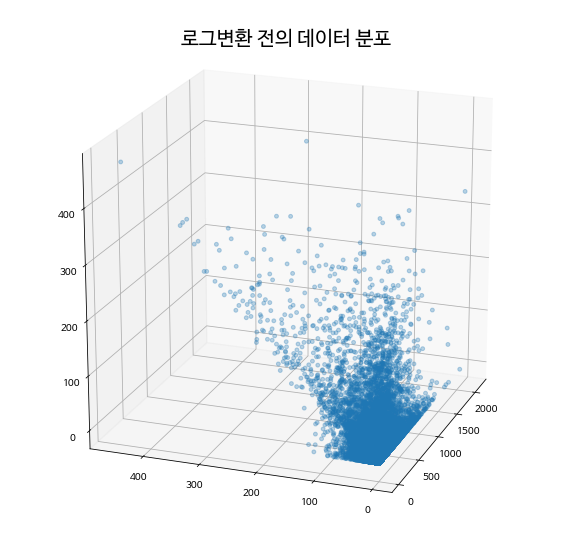

In [11]:
# 로그변환 전
cust_purchase = cust[['num_pur2','num_pur3','num_pur6']]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plt.title('로그변환 전의 데이터 분포', size=20)
ax.view_init(20, -160)
ax.scatter(cust.num_pur2, cust.num_pur3, cust.num_pur6,  marker='o', s=15, cmap='Greens', alpha=0.3)
#ax.scatter(xs, ys, zs, c=color, marker='o', s=15, cmap='Greens')

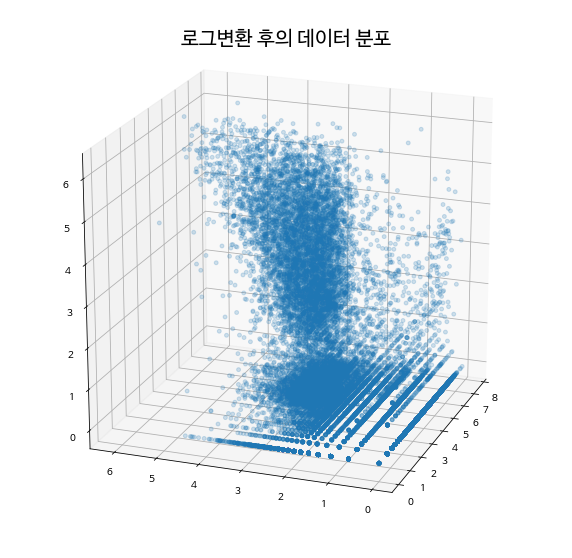

In [12]:
log_cust_purchase = cust[['num_pur2','num_pur3','num_pur6']]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plt.title('로그변환 후의 데이터 분포', size=20)
ax.view_init(20, -160)
ax.scatter(np.log1p(cust.num_pur2), np.log1p(cust.num_pur3), np.log1p(cust.num_pur6),  marker='o', s=15, cmap='Greens', alpha=0.2)
#ax.scatter(xs, ys, zs, c=color, marker='o', s=15, cmap='Greens')

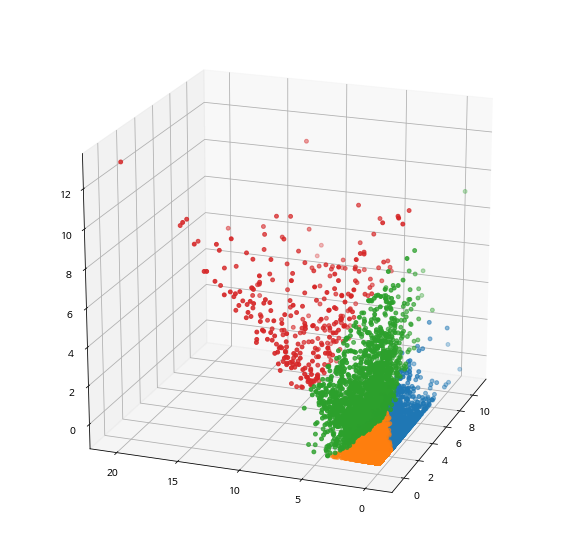

In [15]:
# 로그 변환 전 클러스터링 예시
make_cluster_graph(k=4, scaling='standard', log=False)

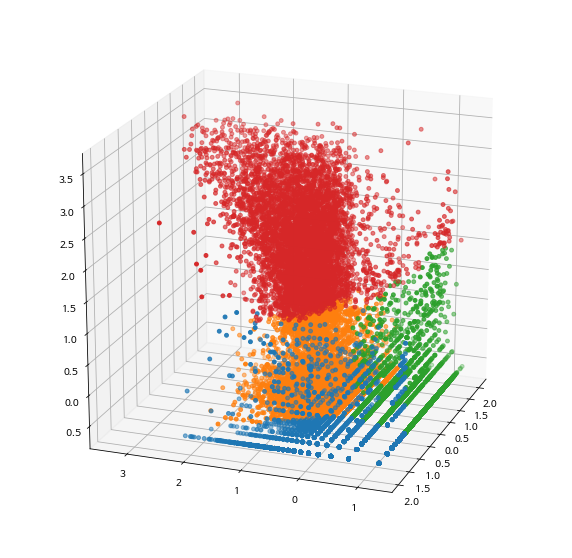

In [14]:
# 로그 변환 후 클러스터링 예시
make_cluster_graph(k=4, scaling='standard', log=True)

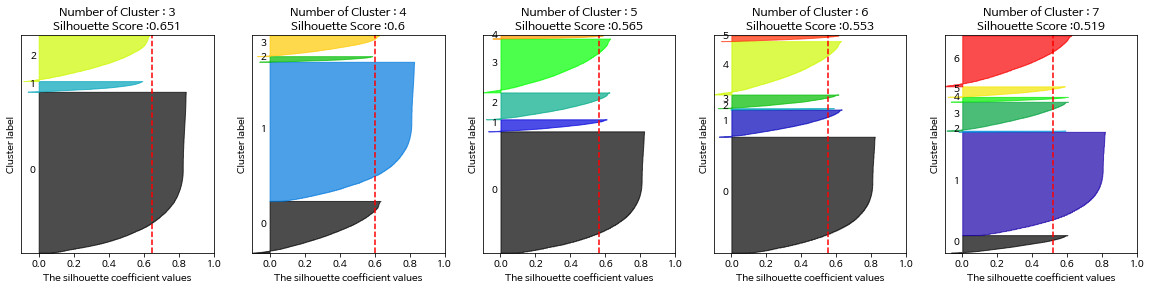

In [16]:
# 로그 변환 전 클러스터링 예시
df = cust[['num_pur2','num_pur3','num_pur6']]
visualize_silhouette([3,4,5,6,7], df)

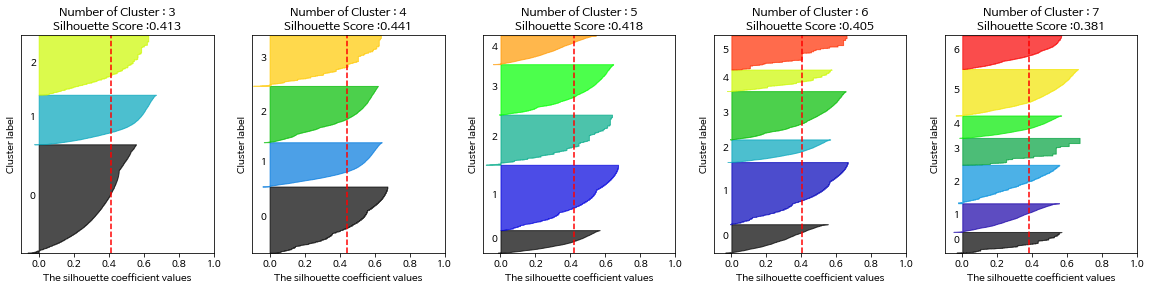

In [17]:
# 로그 변환 후 클러스터링 예시
df = cust[['num_pur2','num_pur3','num_pur6']]
df_log = np.log1p(df)
scaled_df = StandardScaler().fit_transform(df_log)
visualize_silhouette([3,4,5,6,7], scaled_df)

(array([2.7522e+04, 1.2510e+03, 5.4100e+02, 2.9100e+02, 1.4200e+02,
        9.7000e+01, 3.8000e+01, 1.9000e+01, 6.0000e+00, 2.0000e+00]),
 array([  0. ,  46.2,  92.4, 138.6, 184.8, 231. , 277.2, 323.4, 369.6,
        415.8, 462. ]),
 <a list of 10 Patch objects>)

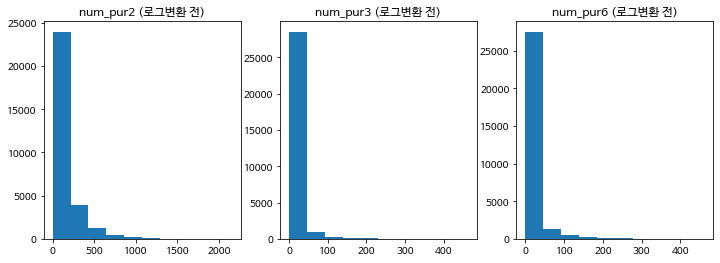

In [18]:
# 로그 변환 전 데이터 분포
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

ax1.set_title('num_pur2 (로그변환 전)')
ax1.hist(cust['num_pur2'])
ax2.set_title('num_pur3 (로그변환 전)')
ax2.hist(cust['num_pur3'])
ax3.set_title('num_pur6 (로그변환 전)')
ax3.hist(cust['num_pur6'])

(array([21007.,  1333.,  1061.,  1227.,  1263.,  1251.,  1227.,   917.,
          506.,   117.]),
 array([0.        , 0.61377271, 1.22754541, 1.84131812, 2.45509082,
        3.06886353, 3.68263623, 4.29640894, 4.91018164, 5.52395435,
        6.13772705]),
 <a list of 10 Patch objects>)

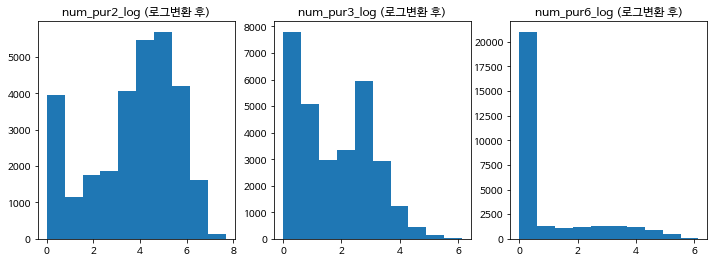

In [19]:
# 로그 변환 후 데이터 분포
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

ax1.set_title('num_pur2_log (로그변환 후)')
ax1.hist(np.log1p(cust['num_pur2']))
ax2.set_title('num_pur3_log (로그변환 후)')
ax2.hist(np.log1p(cust['num_pur3']))
ax3.set_title('num_pur6_log (로그변환 후)')
ax3.hist(np.log1p(cust['num_pur6']))

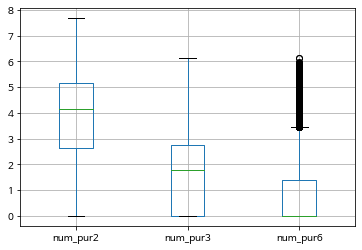

In [20]:
np.log1p(cust[['num_pur2', 'num_pur3', 'num_pur6']]).boxplot()

LPAY 이용횟수 데이터는 0 값이 많아 로그변환이 잘 작동하지 않아 데이터를 구간화(binning)하여 관찰할 변수로 선정
- 0 : LPAY 사용 경험 없음
- 1 : LPAY 사용 경험 단 한 번
- 2~ : 재사용 유저
- 12~ : 라이트 유저 (한 달에 한 번씩 이용)
- 52~ : 미디엄 유저 (일주일에 한 번씩 이용)
- 180~ : 헤비 유저 (이틀에 한 번씩 이용)

In [21]:
print('LPAY 이용횟수 구간화 전')
print('-'*25)
print(cust['num_pur6'].value_counts())

bins = [0, 1, 2, 12, 52, 180, 462]
labels = ['사용안함', '한번사용', '재사용', '라이트', '미디엄', '헤비']
cust['pur6_bin'] = pd.cut(cust['num_pur6'], bins, labels=labels, right=False)
print('='*40)
print('LPAY 이용횟수 구간화 후')
print('-'*25)
print(cust['pur6_bin'].value_counts())

LPAY 이용횟수 구간화 전
-------------------------
0.0      21007
1.0        890
2.0        443
5.0        395
6.0        351
         ...  
330.0        1
271.0        1
336.0        1
291.0        1
237.0        1
Name: num_pur6, Length: 321, dtype: int64
LPAY 이용횟수 구간화 후
-------------------------
사용안함    21007
라이트      2933
재사용      2877
미디엄      1873
한번사용      890
헤비        328
Name: pur6_bin, dtype: int64


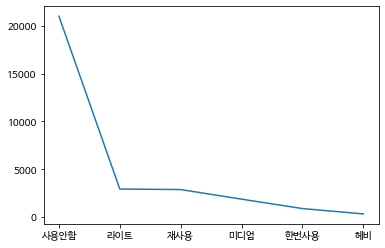

In [22]:
cust['pur6_bin'].value_counts().plot()

- 로그변환을 적용하여 분포의 첨도를 효과적으로 줄일 수 있음을 확인

변수 분포의 첨도(로그 변환 전) : 4.8493950344774115


[]

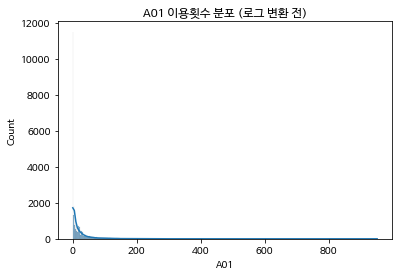

In [23]:
sns.histplot(data=cust, x='A01', kde=True)
print('변수 분포의 첨도(로그 변환 전) :', cust.A01.skew())
plt.title('A01 이용횟수 분포 (로그 변환 전)')
plt.plot()

변수 분포의 첨도(로그 변환 후) : 0.3147895435428482


[]

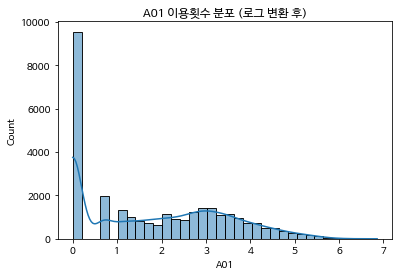

In [25]:
df = cust[['cust', 'A01']]
df.loc[:, 'A01'] = np.log1p(df.loc[:, 'A01'])
sns.histplot(data=df, x='A01', kde=True)
print('변수 분포의 첨도(로그 변환 후) :', df.A01.skew())
plt.title('A01 이용횟수 분포 (로그 변환 후)')
plt.plot()

## 제곱근 변환
np.cbrt()
- 온라인친화도(online_friendly) 변수는 0과 1사이의 값을 갖지만 대부분의 값이 아주 작아 제곱근 변환을 통해 값을 키움
- 변수에 세제곱근변환을 취하여 데이터의 표현력을 늘리고 고객 세분화에 도움

Text(0.5, 1.0, 'online_friendly (변환 전)')

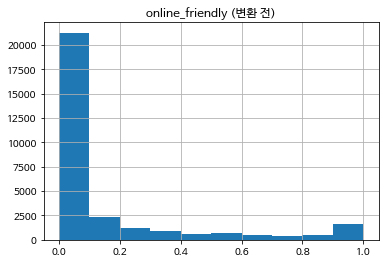

In [26]:
cust[['online_friendly']].hist()
plt.title('online_friendly (변환 전)')

Text(0.5, 1.0, 'online_friendly (변환 후)')

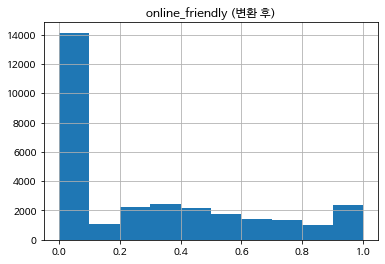

In [27]:
np.cbrt(cust[['online_friendly']]).hist()
plt.title('online_friendly (변환 후)')

## 상관관계
- 변수간 상관관계를 확인

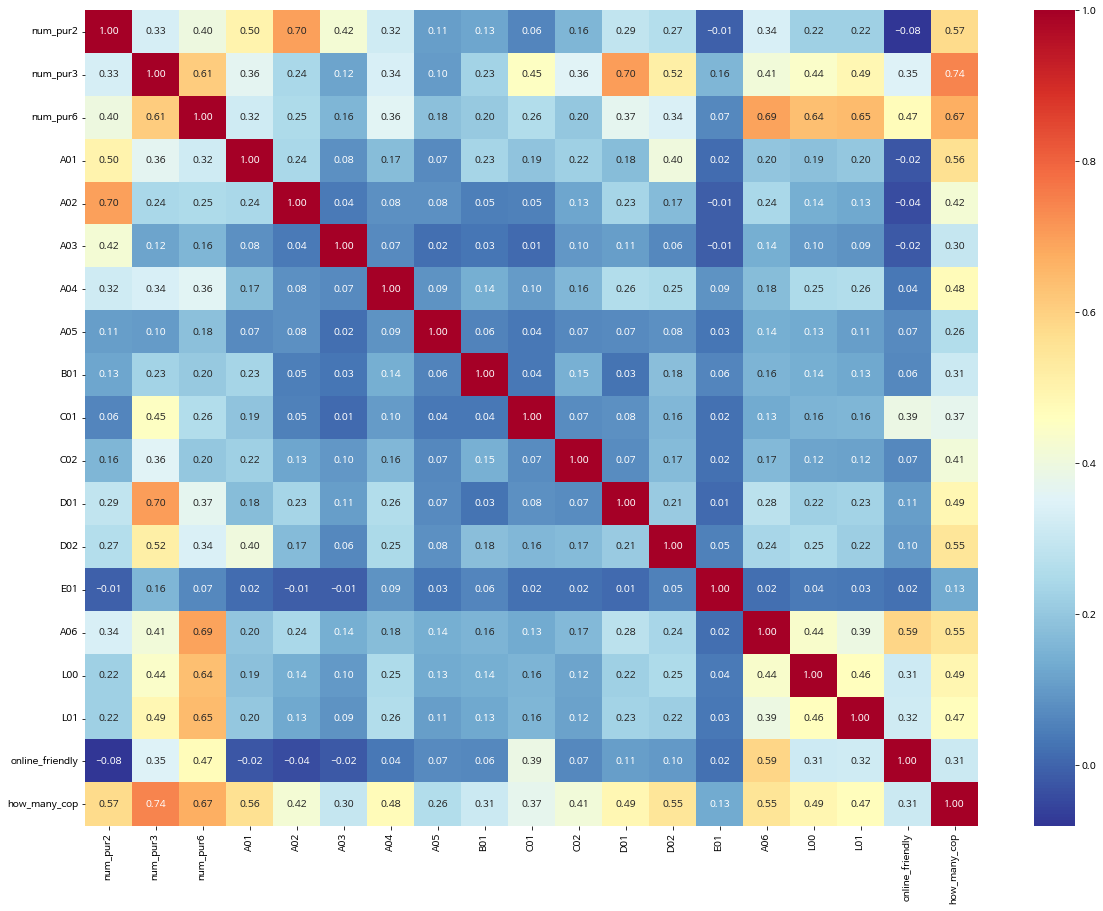

In [28]:
df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)

corr = df.corr()

plt.figure(figsize=(20,15))

sns.heatmap(data=corr, annot=True, fmt = '.2f', cmap='RdYlBu_r')
plt.show()

# K 개수, scaling 방식 탐색
- KMeans 방식은 사전에 군집의 개수 K를 지정해주어야 하기 때문에 어떤 K를 사용할지 다양한 조건으로 탐색하였다.
    - 응집도
    - 실루엣 계수
    - 클러스터 별 데이터 개수
    - 관찰 변수 확인
- KMeans 방식은 데이터 간 거리를 기반으로 작동하기 때문에 스케일링 작업이 필수이다.
    - MinMax
    - Standard
    - Robust

## 응집도

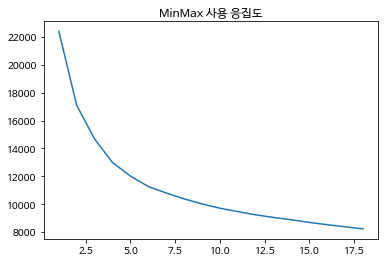

In [29]:
# MinMax

df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)
plt.title('MinMax 사용 응집도')
find_good_k(df=df)

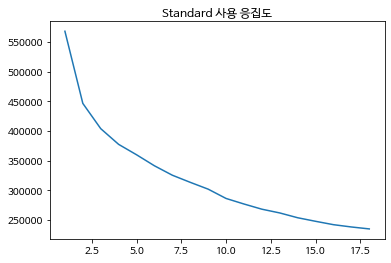

In [30]:
# Standard

df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)
plt.title('Standard 사용 응집도')
find_good_k(df=df, scaling='standard')

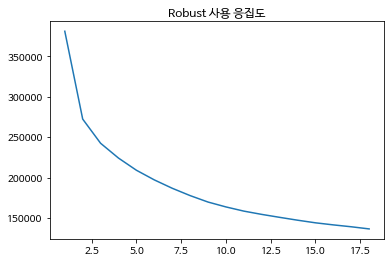

In [31]:
# Robust

df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)
plt.title('Robust 사용 응집도')
find_good_k(df=df, scaling='robust')

## 실루엣 계수

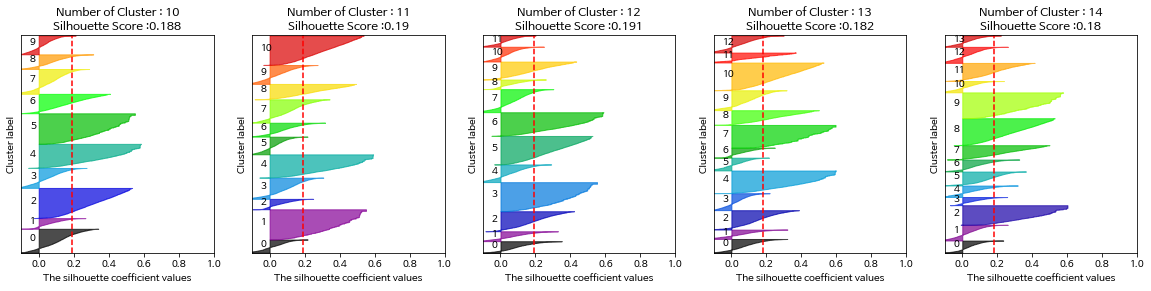

In [32]:
# MinMax

df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)

scaled_df = MinMaxScaler().fit_transform(df)
#scaled_df = StandardScaler().fit_transform(df_log)
#scaled_df = RobustScaler().fit_transform(df_log)
visualize_silhouette([10,11,12,13,14], scaled_df, max_iter=500)

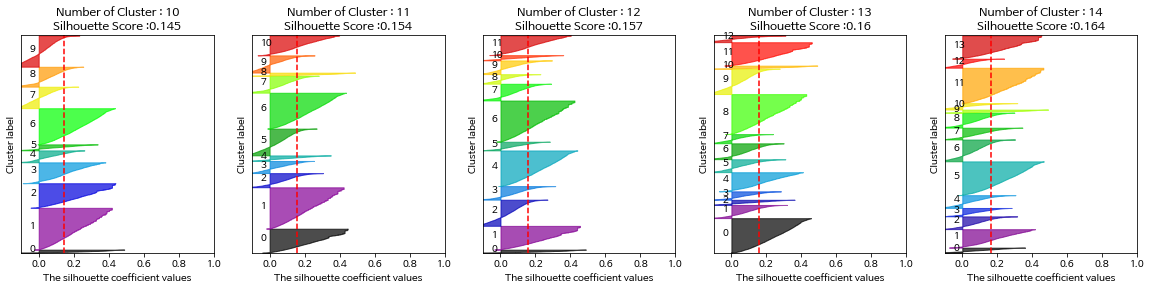

In [33]:
# Standard

df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)

#scaled_df = MinMaxScaler().fit_transform(df)
scaled_df = StandardScaler().fit_transform(df)
#scaled_df = RobustScaler().fit_transform(df)
visualize_silhouette([10,11,12,13,14], scaled_df, max_iter=500)

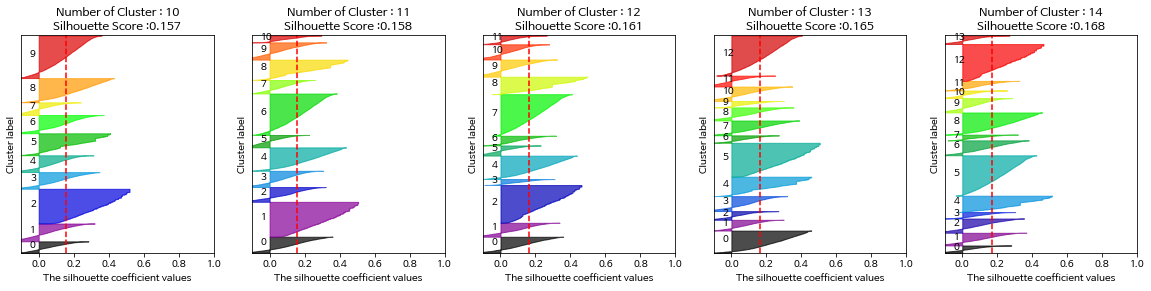

In [34]:
# Robust

df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)

#scaled_df = MinMaxScaler().fit_transform(df)
#scaled_df = StandardScaler().fit_transform(df)
scaled_df = RobustScaler().fit_transform(df)
visualize_silhouette([10,11,12,13,14], scaled_df, max_iter=500)

# 클러스터링 (KMeans)
사용모델
1. 모델 : Kmeans(Scikit-learn : [sklearn.cluster.Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))
2. 매개변수 : n_clusters = 12, init = 'k-means++', max_iter = 500, random_state = 0  

사용 변수
1. 유통사, 제휴사, LPAY 이용횟수('num_pur2', 'num_pur3', 'num_pur6')
2. 계열사별 이용횟수('A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'L00', 'L01')
3. 온라인 친화도('online_friendly')
4. 이용한 계열사 수('how_many_cop')
  
변수 처리
1. 로그 변환 : 이용 횟수
2. 세제곱근 변환 : 온라인 친화도
3. 구간화 : LPAY 이용횟수
4. 스케일링 : MinMax

## 데이터

In [35]:
df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)
df

,num_pur2,num_pur3,num_pur6,A01,A02,A03,A04,A05,B01,C01,C02,D01,D02,E01,A06,L00,L01,online_friendly,how_many_cop
0,3.761200,0.693147,0.000000,1.386294,3.610918,0.000000,1.386294,0.0,0.0,0.000000,0.000000,0.693147,0.000000,0.0,0.000000,0.0,0.0,0.000000,4.0
1,4.488636,2.833213,1.609438,4.234107,2.302585,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.833213,0.000000,0.0,2.484907,0.0,0.0,0.524428,4.0
2,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000,3.044522,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0
3,4.912655,2.397895,0.000000,4.890349,0.000000,1.386294,0.000000,0.0,0.0,0.693147,2.079442,0.000000,1.098612,0.0,0.000000,0.0,0.0,0.000000,5.0
4,4.110874,0.693147,0.000000,4.110874,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.693147,0.000000,0.0,0.000000,0.0,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
29905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
29906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
29907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


## 모델 학습

In [36]:
df = cust[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01', 'online_friendly', 'how_many_cop']]
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)
df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)

scaled_df = MinMaxScaler().fit_transform(df)

kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 500, random_state = 0)
kmeans.fit(scaled_df)
print(np.unique(kmeans.labels_, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([1592, 1362, 2760, 4005, 2438, 3925, 3267, 3182, 1321, 2467, 2037,
       1553]))


In [37]:
cust['cluster'] = kmeans.labels_
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,D02,E01,A06,L00,L01,how_many_cop,online_friendly,cltv,pur6_bin,cluster
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,0,0,0,0,0,4.0,0.000000,1.057668e+06,사용안함,5
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,0,0,11,0,0,4.0,0.144231,2.016931e+07,재사용,0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,1.0,0.000000,6.780768e+04,사용안함,1
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,2,0,0,0,0,5.0,0.000000,9.581719e+05,사용안함,2
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,0,0,0,0,0,2.0,0.000000,6.788530e+06,사용안함,2


# 결과 시각화

## 변수별 상대적 비율

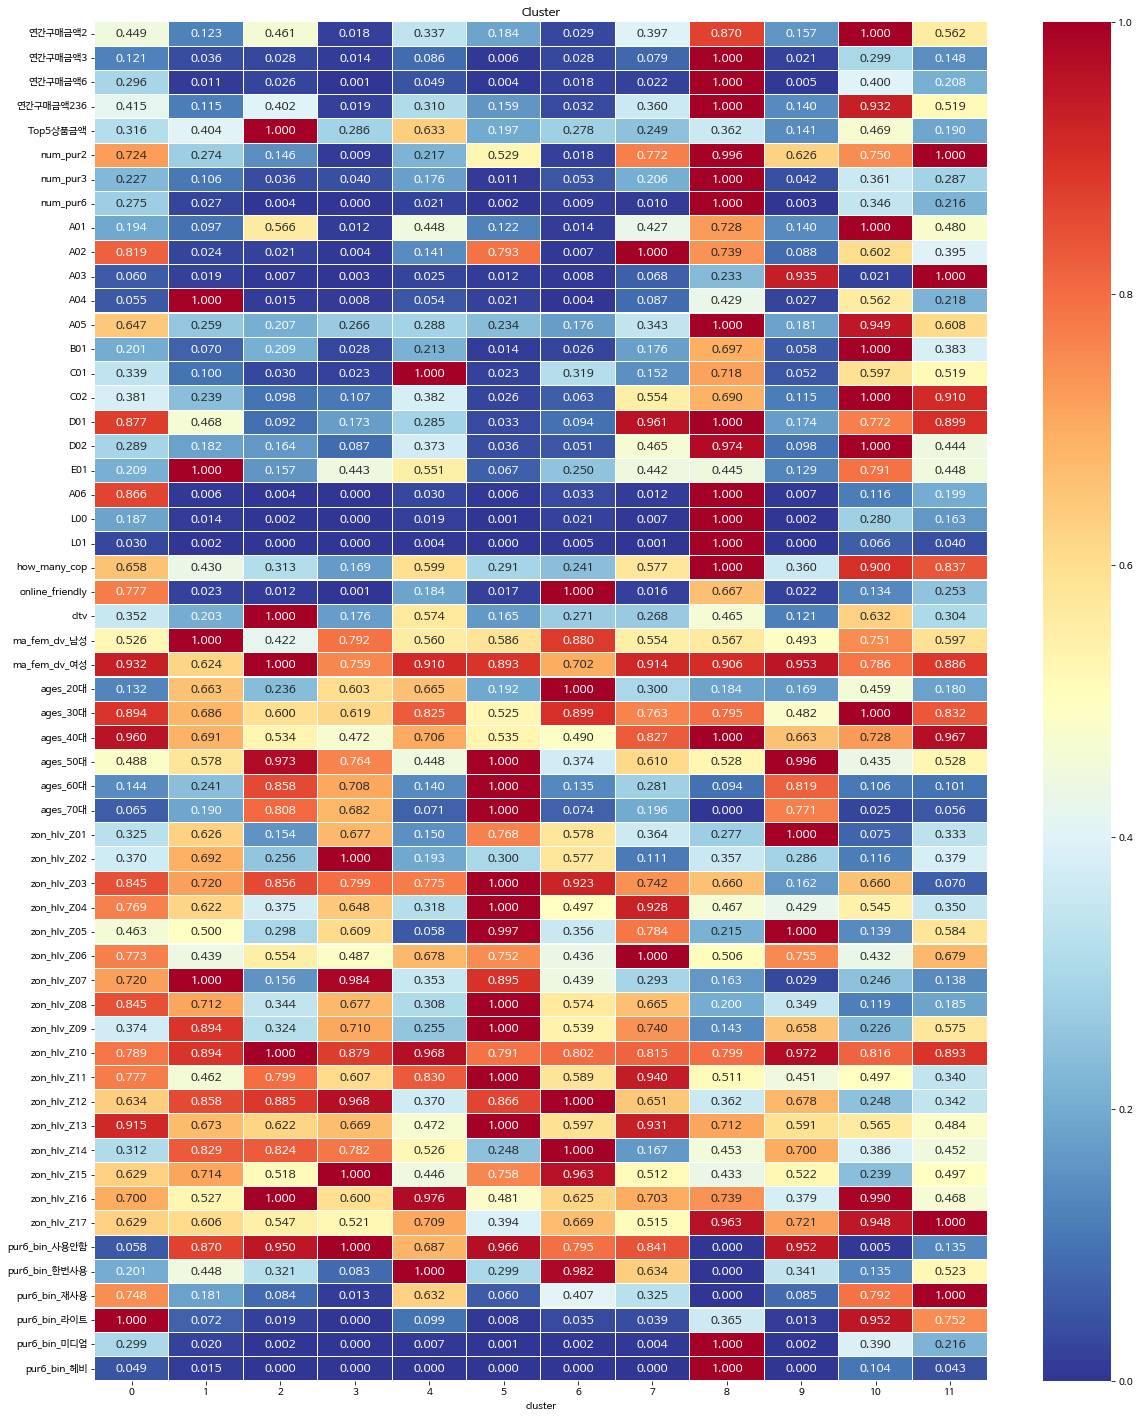

In [38]:
cust_dummy = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv', 'pur6_bin'])
temp = cust_dummy.groupby(['cluster']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)

plt.figure(figsize = (20, 25))
annot_kws = {'fontsize':12}
sns.heatmap(mean_table,
           annot=True,
           fmt='.3f',
           linewidths=0.1,
           annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.title('Cluster')
plt.show()

## 변수별 클러스터 분포

### 구매금액, 고객 생애 가치, 이용한 계열사 수, 온라인 친화도, 성별
원활한 기각화를 위해 관찰변수값에 처리를 함
- 구매금액, 고객 생애 가치 : 로그변환
- 온라인 친화도 : 세제곱근변환
성별
- 여성의 비율을 나타냄
- 여성의 비율 평균 : 0.67

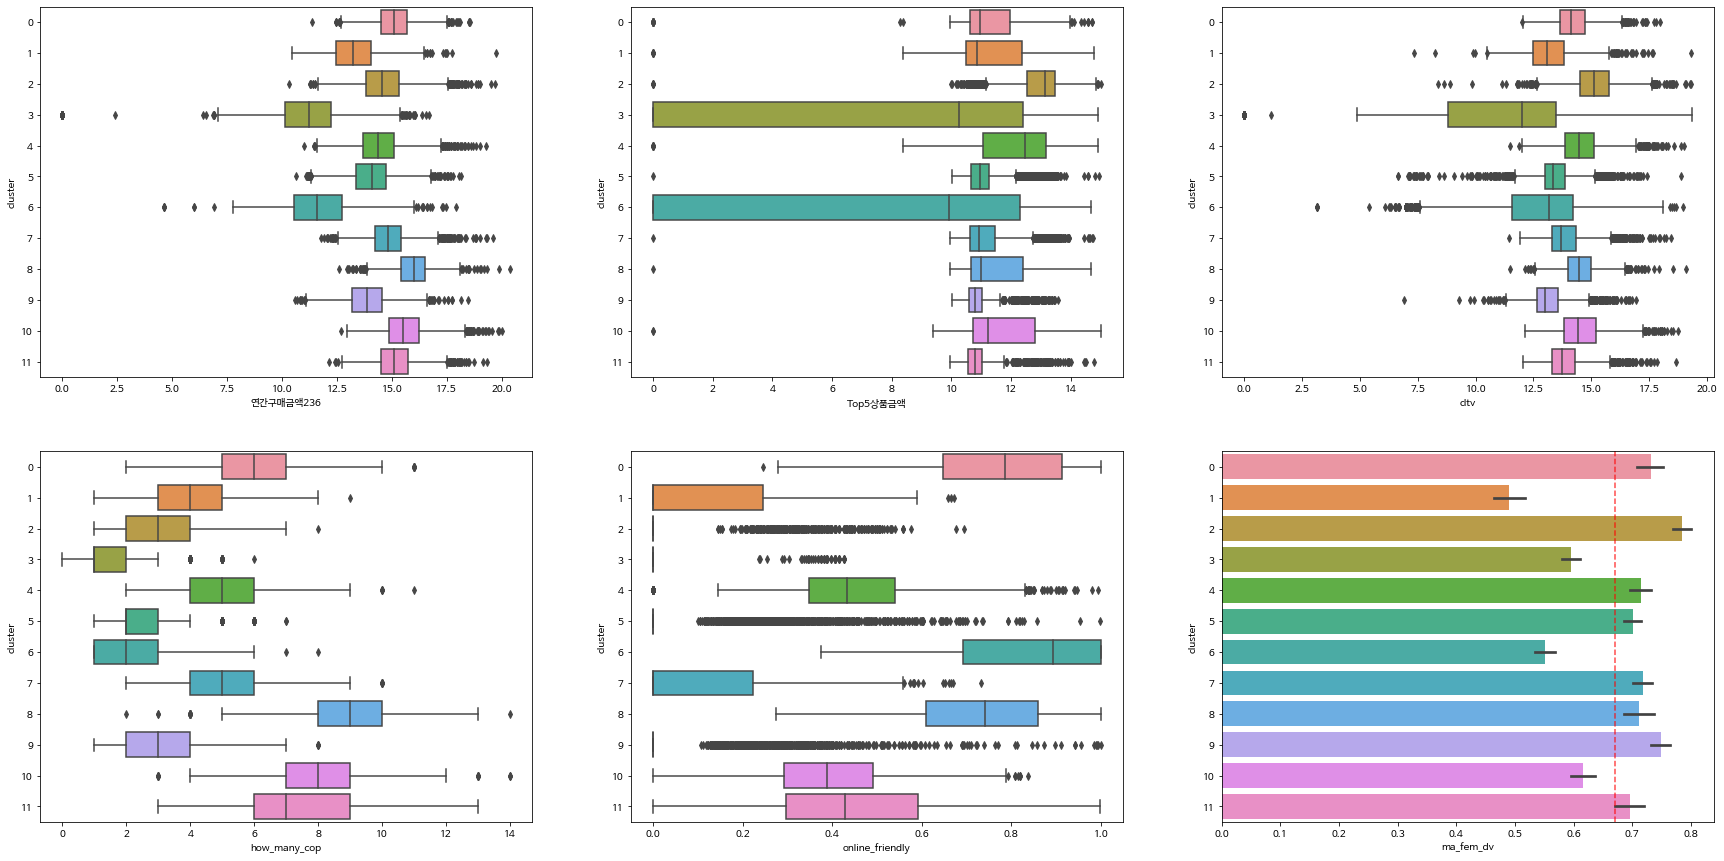

In [39]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster', '연간구매금액236', 'cltv', 'Top5상품금액', 'online_friendly', 'how_many_cop', 'ma_fem_dv']]
df.연간구매금액236 = np.log1p(df.연간구매금액236)
df.online_friendly = np.cbrt(df.online_friendly)
df.cltv = np.log1p(df.cltv)
df.Top5상품금액 = np.log1p(df.Top5상품금액)
df.ma_fem_dv = df.ma_fem_dv.where(df.ma_fem_dv=='남성', 1)
df.ma_fem_dv = df.ma_fem_dv.mask(df.ma_fem_dv=='남성', 0)

sns.boxplot(data=df, y='cluster', x='연간구매금액236', orient='h', ax=ax1)
sns.boxplot(data=df, y='cluster', x='Top5상품금액', orient='h', ax=ax2)
sns.boxplot(data=df, y='cluster', x='cltv', orient='h', ax=ax3)
sns.boxplot(data=df, y='cluster', x='how_many_cop', orient='h', ax=ax4)
sns.boxplot(data=df, y='cluster', x='online_friendly', orient='h', ax=ax5)

sns.barplot(data=df, y='cluster', x='ma_fem_dv', orient='h', ax=ax6)
plt.axvline(x=0.67, linestyle='--', color='r', alpha=0.7)

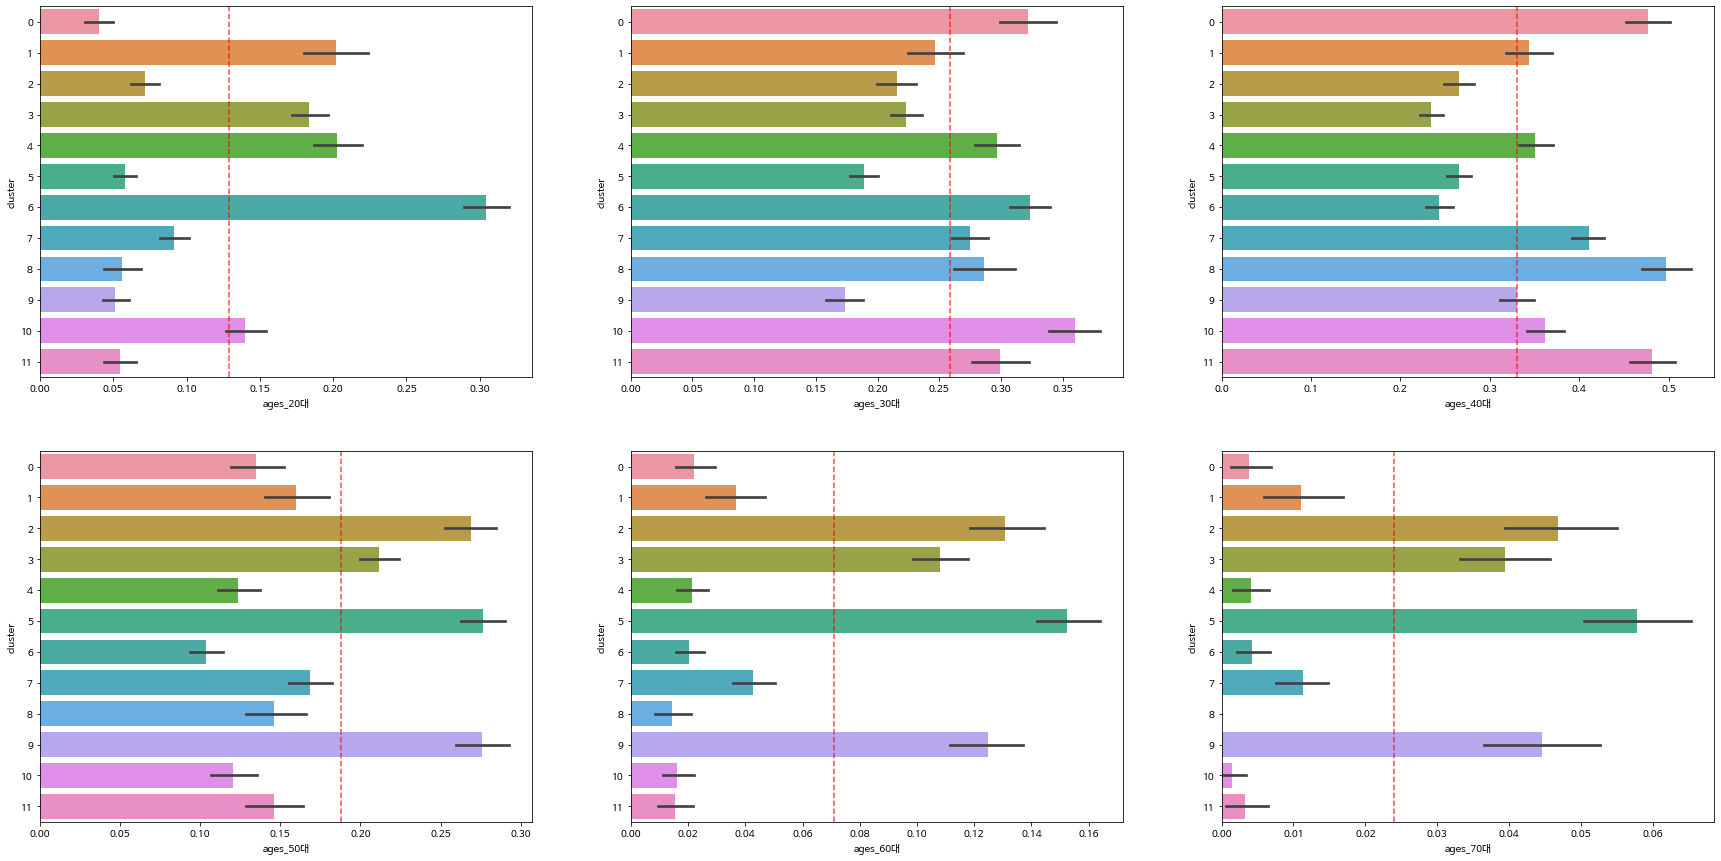

In [40]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster', 'ages']]
df = pd.get_dummies(df, columns=['ages'])

sns.barplot(data=df, y='cluster', x='ages_20대', orient='h', ax=ax1)
ax1.axvline(x=0.129, linestyle='--', color='r', alpha=0.7)
sns.barplot(data=df, y='cluster', x='ages_30대', orient='h', ax=ax2)
ax2.axvline(x=0.259, linestyle='--', color='r', alpha=0.7)
sns.barplot(data=df, y='cluster', x='ages_40대', orient='h', ax=ax3)
ax3.axvline(x=0.33, linestyle='--', color='r', alpha=0.7)
sns.barplot(data=df, y='cluster', x='ages_50대', orient='h', ax=ax4)
ax4.axvline(x=0.188, linestyle='--', color='r', alpha=0.7)
sns.barplot(data=df, y='cluster', x='ages_60대', orient='h', ax=ax5)
ax5.axvline(x=0.071, linestyle='--', color='r', alpha=0.7)
sns.barplot(data=df, y='cluster', x='ages_70대', orient='h', ax=ax6)
ax6.axvline(x=0.024, linestyle='--', color='r', alpha=0.7)

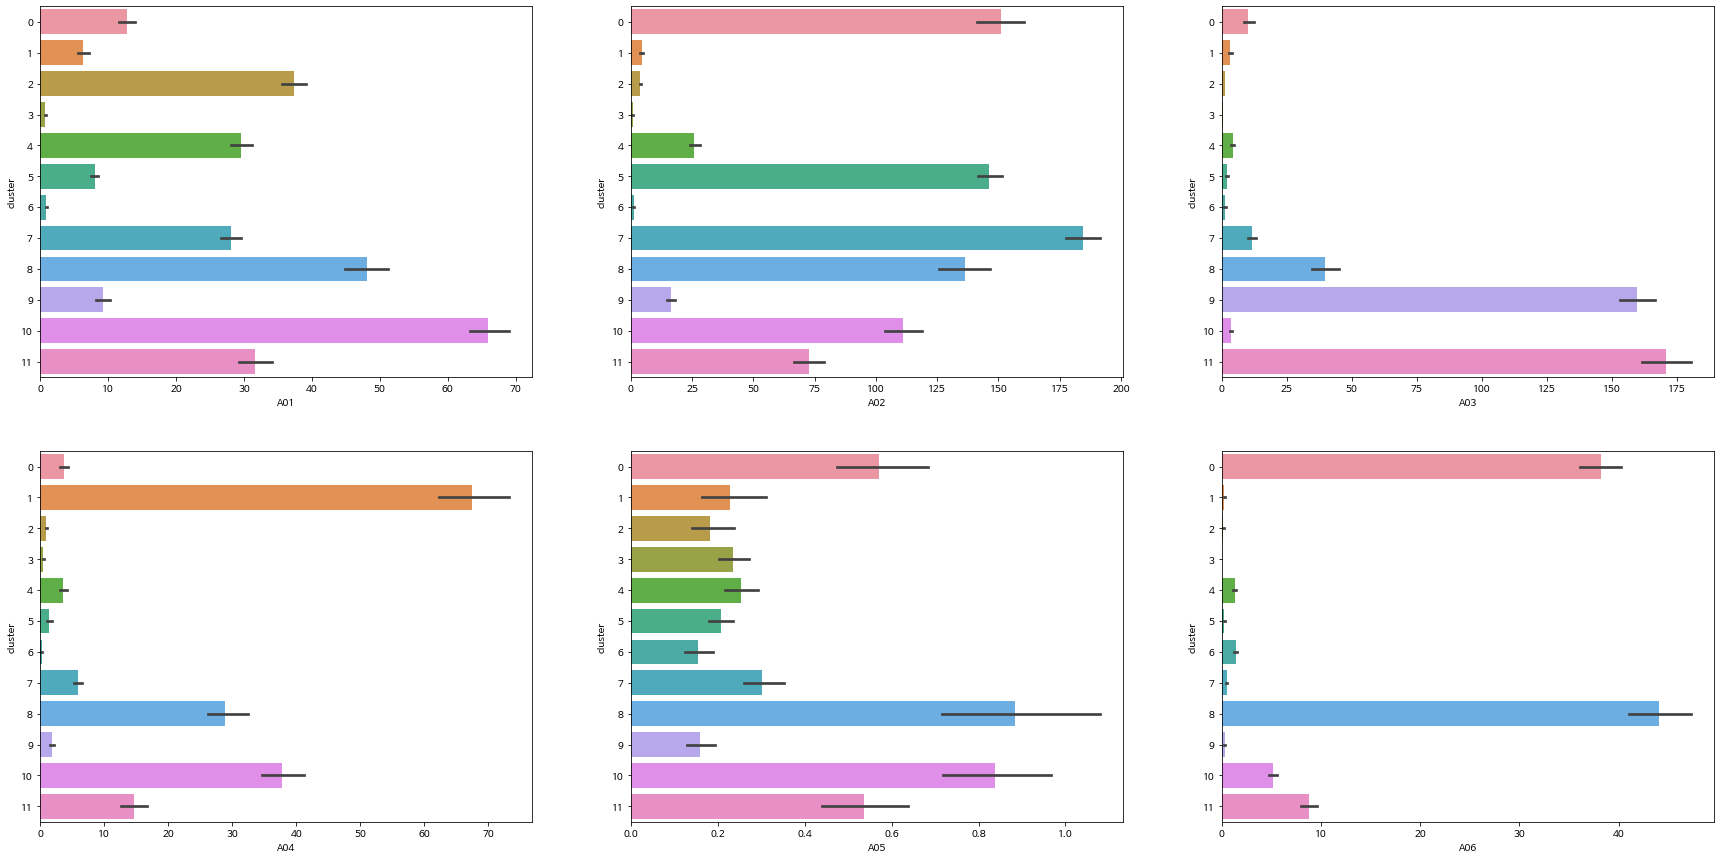

In [41]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06']]

sns.barplot(data=df, y='cluster', x='A01', orient='h', ax=ax1)
sns.barplot(data=df, y='cluster', x='A02', orient='h', ax=ax2)
sns.barplot(data=df, y='cluster', x='A03', orient='h', ax=ax3)
sns.barplot(data=df, y='cluster', x='A04', orient='h', ax=ax4)
sns.barplot(data=df, y='cluster', x='A05', orient='h', ax=ax5)
sns.barplot(data=df, y='cluster', x='A06', orient='h', ax=ax6)

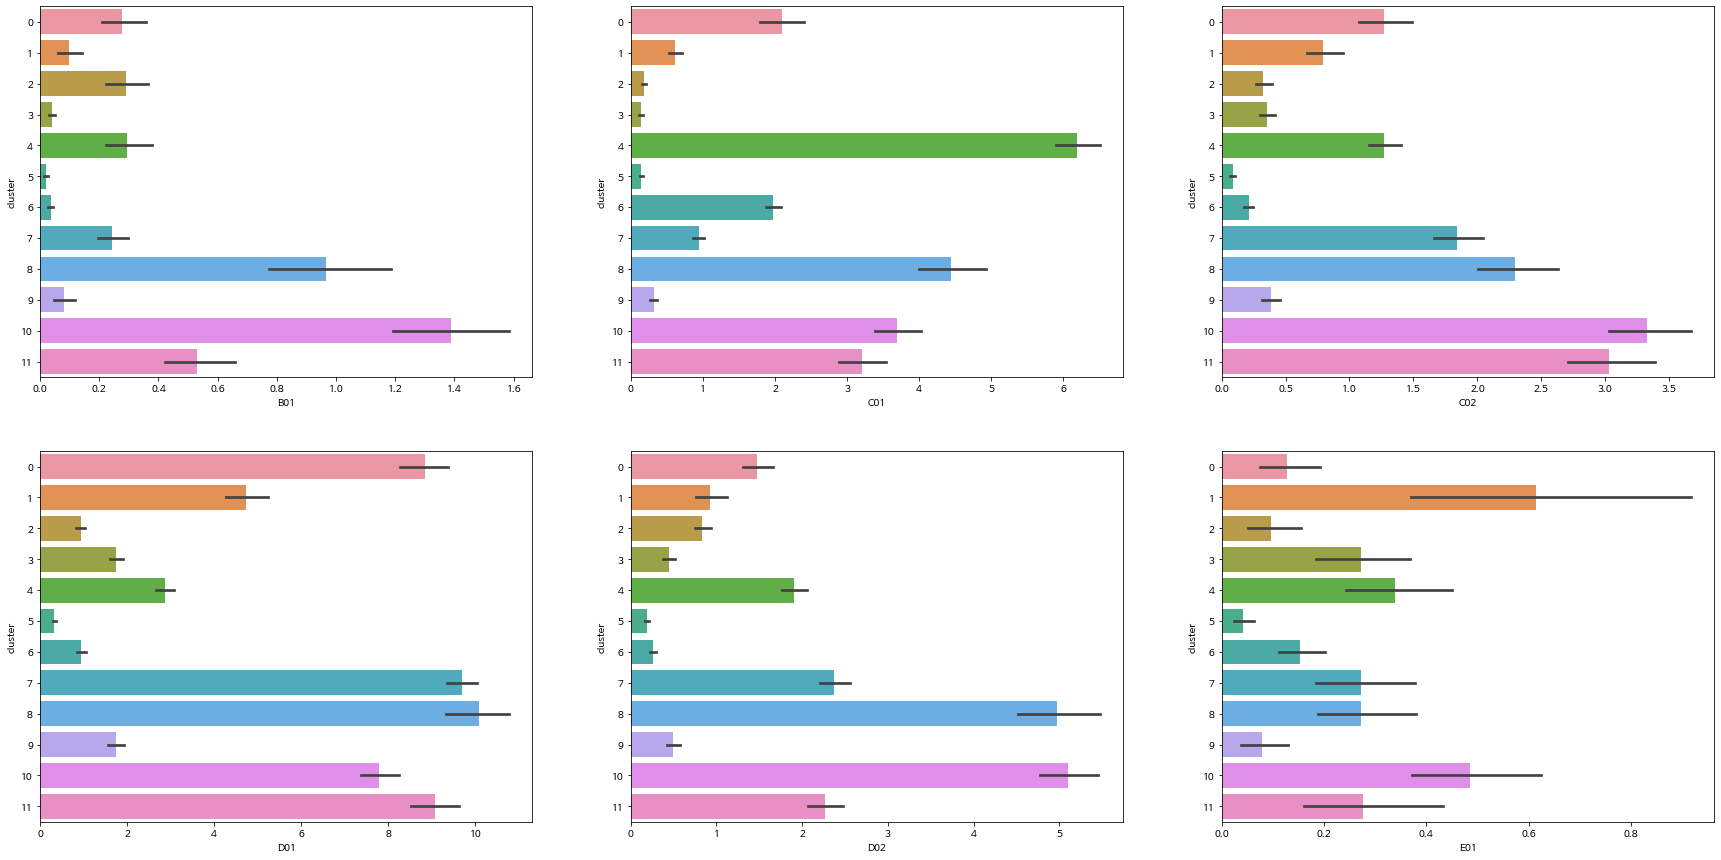

In [42]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01']]

sns.barplot(data=df, y='cluster', x='B01', orient='h', ax=ax1)
sns.barplot(data=df, y='cluster', x='C01', orient='h', ax=ax2)
sns.barplot(data=df, y='cluster', x='C02', orient='h', ax=ax3)
sns.barplot(data=df, y='cluster', x='D01', orient='h', ax=ax4)
sns.barplot(data=df, y='cluster', x='D02', orient='h', ax=ax5)
sns.barplot(data=df, y='cluster', x='E01', orient='h', ax=ax6)

## 클러스터당 LPAY 이용 분포

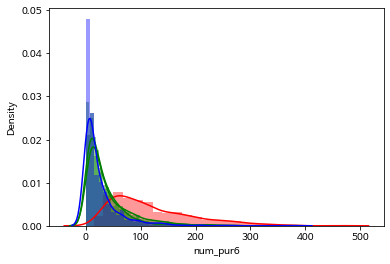

In [43]:
# LPAY 결제 사용
sns.distplot(cust.loc[cust.cluster==8].num_pur6, color="red")

sns.distplot(cust.loc[cust.cluster==0].num_pur6, color='green')
sns.distplot(cust.loc[cust.cluster==10].num_pur6, color='green')

sns.distplot(cust.loc[cust.cluster==11].num_pur6, color='blue')

## 구매 물품

### 클러스터별 가장 많이 Top5에 오른 물품

In [44]:
df = cust[['cust', 'cluster', 'Top5상품']]
df.Top5상품.loc[df.Top5상품=='0번 구매'] = "['1년간유통사제품구매없음']"
df_pd = df.groupby('cluster')['Top5상품'].sum().apply(lambda x: pd.Series(x[1:-1].replace('][', ' ').split(' '))).T
df_pd

cluster,0,1,2,3,4,5,6,7,8,9,10,11
0,'여성의류','대용식','과자','남성의류','속옷/양말/홈웨어','채소','테넌트/음식점','채소','음료','주류','여성의류','채소'
1,'침구/수예','과자','냉장식품','생활/주방가전','유아동의류','과자','냉동식품','과일','과자','음료','테넌트/음식점','음료'
2,'패션잡화','음료','조리식품','구기/필드스포츠','대용식','조미료','속옷/양말/홈웨어','과자','테넌트/음식점','냉장식품','남성의류','조미료'
3,'남성의류','조리식품','과일','패션잡화','유제품','과일','스포츠패션','유제품','유제품','청소/세탁/욕실용품','스포츠패션','패션잡화'
4,'세제/위생','냉장식품','채소','컴퓨터','조리식품','속옷/양말/홈웨어','주방잡화','냉장식품','채소','조리식품','과자','냉장식품'
...,...,...,...,...,...,...,...,...,...,...,...,...
19603,NaN,NaN,NaN,NaN,NaN,'기타(비상품)',NaN,NaN,NaN,NaN,NaN,NaN
19604,NaN,NaN,NaN,NaN,NaN,'냉장식품',NaN,NaN,NaN,NaN,NaN,NaN
19605,NaN,NaN,NaN,NaN,NaN,'과자',NaN,NaN,NaN,NaN,NaN,NaN
19606,NaN,NaN,NaN,NaN,NaN,'조미료',NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
for i in range(12):
    print(f'| cluster {i} |')
    print('-'*13)
    print(df_pd[i].value_counts())
    print('='*30)

| cluster 0 |
-------------
'과자'              899
'채소'              862
'대용식'             729
'유제품'             664
'과일'              628
'냉장식품'            553
'음료'              509
'축산물'             451
'테넌트/음식점'         228
'조미료'             219
'상품권'             179
'여성의류'            160
'주류'              152
'냉동식품'            133
'스포츠패션'           131
'남성의류'            120
'패션잡화'            106
'유아동의류'            91
'화장품/뷰티케어'         88
'청소/세탁/욕실용품'       83
'완구'               75
'조리식품'             74
'수산물'              68
'문구/사무용품'          68
'세제/위생'            64
'속옷/양말/홈웨어'        59
'기타(비상품)'          52
'건강식품'             49
'퍼스널케어'            46
'커피/차'             30
'건해산물'             29
'담배'               25
'주방잡화'             22
'모바일'              18
'컴퓨터'              18
'건강용품'             15
'원예/애완'            14
'1년간유통사제품구매없음'     13
'출산/육아용품'          13
'생활/렌탈서비스'         12
'생활/주방가전'          12
'유아식품'             12
'아웃도어/레저'          10
'식기/조리기구'          10
'구기/

### 클러스터별 최다 구매 물품 (대분류)

In [46]:
df = cust[['cust', 'cluster']]
df = pd.merge(purchase_list, df, on='cust')
df = pd.merge(df, data4, on='pd_c')

In [47]:
# 잦은 구매 순(sum 이용)
purchase_times = df.groupby(['cluster', 'clac_hlv_nm'])['count'].sum()
for cluster in range(12):
    print(f'| cluster {cluster} |')
    print('-'*13)
    print(purchase_times[cluster].sort_values(ascending=False)[:50])
    print('='*30)

| cluster 0 |
-------------
clac_hlv_nm
채소            36160
과자            26930
유제품           22020
대용식           20949
과일            19885
냉장식품          19147
축산물           18016
음료            16797
조미료           12294
냉동식품           8571
주류             7323
테넌트/음식점        6456
수산물            6384
청소/세탁/욕실용품     5960
조리식품           5490
세제/위생          5334
문구/사무용품        4684
건해산물           4456
퍼스널케어          3932
여성의류           3864
주방잡화           3784
패션잡화           3327
상품권            3210
완구             3075
커피/차           2875
스포츠패션          2860
병통조림           2813
속옷/양말/홈웨어      2781
화장품/뷰티케어       2650
남성의류           2341
유아동의류          2134
양곡             1805
식기/조리기구        1384
기타(비상품)        1228
건강식품           1224
원예/애완          1197
출산/육아용품         919
유아식품            886
공구/안전용품         858
건강용품            773
침구/수예           664
자동차용품           619
아웃도어/레저         608
담배              501
생활/주방가전         494
컴퓨터             482
모바일             353
구기/필드스포츠        337


In [48]:
# 구매 경험 (count 이용)
purchase_times = df.groupby(['cluster', 'clac_hlv_nm'])['count'].count()
for cluster in range(12):
    print(f'| cluster {cluster} |')
    print('-'*13)
    print(purchase_times[cluster].sort_values(ascending=False)[:50])
    print('='*30)

| cluster 0 |
-------------
clac_hlv_nm
채소            14664
과자             9787
과일             8824
대용식            8503
조미료            7924
냉장식품           7751
축산물            7535
음료             5772
유제품            4976
수산물            3942
냉동식품           3914
세제/위생          3269
조리식품           2925
테넌트/음식점        2890
건해산물           2728
퍼스널케어          2681
주방잡화           2598
패션잡화           2518
주류             2260
문구/사무용품        2144
여성의류           2084
속옷/양말/홈웨어      1995
스포츠패션          1950
화장품/뷰티케어       1904
청소/세탁/욕실용품     1811
병통조림           1729
완구             1666
커피/차           1609
남성의류           1442
유아동의류          1375
양곡             1134
식기/조리기구        1128
건강식품            847
상품권             724
출산/육아용품         644
공구/안전용품         635
원예/애완           616
자동차용품           526
침구/수예           522
건강용품            516
아웃도어/레저         441
생활/주방가전         360
기타(비상품)         336
컴퓨터             316
유아식품            311
모바일             285
인테리어/조명         281
구기/필드스포츠        251


### 클러스터별 최다 구매 물품 (중분류)

In [49]:
# 잦은 구매 순(sum 이용)
purchase_times = df.groupby(['cluster', 'clac_mcls_nm'])['count'].sum()
for cluster in range(12):
    print(f'| cluster {cluster} |')
    print('-'*13)
    print(purchase_times[cluster].sort_values(ascending=False)[:50])
    print('='*30)

| cluster 0 |
-------------
clac_mcls_nm
스낵류           11404
국산과일          10408
우유             9675
잎채소            9322
두부/콩나물류        8679
요구르트           7737
수입과일           6972
냉동간편식          6869
열매채소           6356
비스킷류           6034
계란류            5866
봉지라면           5770
식당             5213
청소용품           5063
레토르트           4965
햄/소시지          4932
탄산음료           4802
소스류            4741
생수             4606
어묵/맛살          4365
버섯류            3876
냉장간편식          3796
양채류            3781
맥주             3529
뿌리채소           3299
포장반찬           3272
파티/팬시용품        3236
사탕/캔디          3198
모바일상품권         3186
과채음료           3138
유가공품           3048
빵              3043
용기라면           2857
국산돼지고기         2846
닭고기류           2710
건면             2699
냉장조리           2659
화장지/티슈         2520
조미료류           2499
해조류            2459
주방정리용품/소모품     2381
초콜릿            2348
파이류            2209
냉장음료           1933
소주             1930
장류             1833
국산소고기          1809
건어물            1804

In [50]:
# 구매 경험 (count 이용)
purchase_times = df.groupby(['cluster', 'clac_mcls_nm'])['count'].count()
for cluster in range(12):
    print(f'cluster {cluster}')
    print('-'*13)
    print(purchase_times[cluster].sort_values(ascending=False)[:50])
    print('='*30)

cluster 0
-------------
clac_mcls_nm
국산과일          4434
잎채소           4129
스낵류           3100
냉동간편식         3079
수입과일          2780
열매채소          2498
소스류           2486
레토르트          2412
두부/콩나물류       2393
식당            2302
비스킷류          2209
버섯류           1896
요구르트          1837
냉장간편식         1807
조미료류          1725
햄/소시지         1707
뿌리채소          1676
건면            1598
주방정리용품/소모품    1597
어묵/맛살         1576
양채류           1559
탄산음료          1522
봉지라면          1503
포장반찬          1470
사탕/캔디         1433
우유            1404
닭고기류          1365
해조류           1345
냉장조리          1339
화장지/티슈        1334
장류            1296
과채음료          1295
국산돼지고기        1289
유가공품          1263
계란류           1256
건어물           1240
빵             1183
초콜릿           1134
청소용품          1071
생수            1060
어류             972
용기라면           954
국산소고기          948
맥주             944
견과류            941
파티/팬시용품        938
식용유류           913
스킨케어           910
양념육            895
파이류            867
Name: count, 

### 다른 클러스터에 비해 유난히 많이 구매한 물품 (대분류)
- 클러스터 내의 각 고객이 구매한 물품을 합하거나(sum) 구매 여부를 세어(count) 클러스터 별 상품 구매량(빈도)를 행렬 생성
- 이후 IQR 방식을 이용하여 각 상품별로 구매량(빈도)이 유난히 많은 상품을 탐색
- IQR 방식에서 이상치를 탐지할 때 주로 사용되는 계수 1.5를 튜닝하여 탐색범위를 넓히거나 좁힐 수 있음

In [51]:
# 잦은 구매순 (sum)
hlv_list = data4.clac_hlv_nm.unique()
hlv_df = pd.DataFrame(index=hlv_list, columns=range(12))
purchase_times = df.groupby(['cluster', 'clac_hlv_nm'])['count'].sum()
for cluster in range(12):
    hlv_df[cluster].update(purchase_times[cluster].sort_values(ascending=False))
hlv_df.fillna(0, inplace=True)
hlv_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
가구,268.0,18.0,417.0,15.0,251.0,512.0,49.0,558.0,410,160.0,666.0,245.0
건강식품,1224.0,294.0,1050.0,44.0,684.0,2291.0,118.0,2343.0,1707,850.0,1921.0,1123.0
건강용품,773.0,920.0,351.0,46.0,464.0,1109.0,63.0,1586.0,1202,628.0,1497.0,810.0
건해산물,4456.0,230.0,712.0,60.0,1295.0,10474.0,171.0,11295.0,4109,7002.0,3979.0,6086.0
계절가전,63.0,16.0,100.0,138.0,56.0,102.0,31.0,103.0,123,58.0,123.0,85.0


In [52]:
from collections import defaultdict
hlv_dict = defaultdict(list)
for hlv in hlv_df.index:
    q3 = hlv_df.loc[hlv].quantile(0.75)
    q1 = hlv_df.loc[hlv].quantile(0.25)
    iqr = q3 - q1
    for cluster, val in enumerate(hlv_df.loc[hlv].values):
        if val > q3 + 1.5 * iqr: # 이상치 판단 기준 설정
            hlv_dict[cluster].append(hlv)
            print(f'cluster {cluster} : {hlv} (총 구매수량 : {int(val)})')
print('')
print('유난히 많이 구매한 물품')
hlv_dict

cluster 5 : 공구/안전용품 (총 구매수량 : 2611)
cluster 7 : 공구/안전용품 (총 구매수량 : 2761)
cluster 8 : 금융/보험서비스 (총 구매수량 : 1)
cluster 10 : 기타상품 (총 구매수량 : 3)
cluster 1 : 담배 (총 구매수량 : 16133)
cluster 10 : 담배 (총 구매수량 : 6884)
cluster 5 : 문구/사무용품 (총 구매수량 : 14508)
cluster 7 : 문구/사무용품 (총 구매수량 : 16899)
cluster 0 : 상품권 (총 구매수량 : 3210)
cluster 8 : 상품권 (총 구매수량 : 4255)
cluster 1 : 생활/렌탈서비스 (총 구매수량 : 2720)
cluster 10 : 생활/렌탈서비스 (총 구매수량 : 3353)
cluster 7 : 서적/음반/악기 (총 구매수량 : 889)
cluster 7 : 속옷/양말/홈웨어 (총 구매수량 : 6658)
cluster 7 : 시즌스포츠 (총 구매수량 : 452)
cluster 5 : 아웃도어/레저 (총 구매수량 : 1516)
cluster 7 : 아웃도어/레저 (총 구매수량 : 1695)
cluster 5 : 양곡 (총 구매수량 : 4950)
cluster 7 : 완구 (총 구매수량 : 8208)
cluster 5 : 원예/애완 (총 구매수량 : 3845)
cluster 7 : 원예/애완 (총 구매수량 : 3427)
cluster 7 : 유아동의류 (총 구매수량 : 4676)
cluster 7 : 유아식품 (총 구매수량 : 2306)
cluster 5 : 인테리어/조명 (총 구매수량 : 995)
cluster 7 : 인테리어/조명 (총 구매수량 : 994)
cluster 5 : 자동차용품 (총 구매수량 : 2136)
cluster 7 : 자동차용품 (총 구매수량 : 2428)
cluster 7 : 출산/육아용품 (총 구매수량 : 2516)
cluster 7 : 커피/차 (총 구매수량 : 7132)
clu

defaultdict(list,
            {0: ['상품권'],
             1: ['담배', '생활/렌탈서비스'],
             5: ['공구/안전용품',
              '문구/사무용품',
              '아웃도어/레저',
              '양곡',
              '원예/애완',
              '인테리어/조명',
              '자동차용품',
              '퍼스널케어'],
             7: ['공구/안전용품',
              '문구/사무용품',
              '서적/음반/악기',
              '속옷/양말/홈웨어',
              '시즌스포츠',
              '아웃도어/레저',
              '완구',
              '원예/애완',
              '유아동의류',
              '유아식품',
              '인테리어/조명',
              '자동차용품',
              '출산/육아용품',
              '커피/차',
              '퍼스널케어'],
             8: ['금융/보험서비스', '상품권'],
             10: ['기타상품', '담배', '생활/렌탈서비스']})

- cluster 5, 7에서 공구/안전용품의 구매가 유난히 많다는 점을 시사

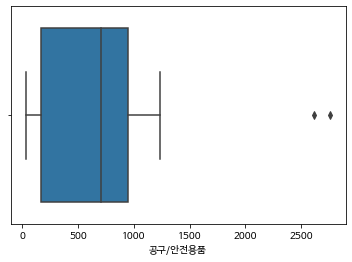

In [53]:
sns.boxplot(x = '공구/안전용품', data = hlv_df.T)

In [54]:
# 구매 경험 (count)
hlv_list = data4.clac_hlv_nm.unique()
hlv_df = pd.DataFrame(index=hlv_list, columns=range(12))
purchase_times = df.groupby(['cluster', 'clac_hlv_nm'])['count'].count()
for cluster in range(12):
    hlv_df[cluster].update(purchase_times[cluster].sort_values(ascending=False)/len(cust.loc[cust.cluster==cluster].num_pur2)) #sum에서 numpur2 개수 나누는게 맞나?
hlv_df.fillna(0, inplace=True)
hlv_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
가구,0.134422,0.010279,0.076812,0.003496,0.061526,0.111592,0.012550,0.135135,0.205148,0.034860,0.183112,0.110753
건강식품,0.532035,0.135095,0.193478,0.010237,0.187859,0.369682,0.029079,0.464173,0.769871,0.191325,0.516446,0.446233
건강용품,0.324121,0.416300,0.083696,0.010986,0.146432,0.197452,0.016835,0.331867,0.576836,0.167410,0.473736,0.368319
건해산물,1.713568,0.140969,0.184420,0.014482,0.436833,1.637707,0.041016,2.008799,1.813020,1.657884,1.243986,2.157759
계절가전,0.035176,0.011747,0.027536,0.026467,0.018048,0.021911,0.008264,0.025141,0.072672,0.017025,0.043692,0.042498


In [55]:
from collections import defaultdict
hlv_dict = defaultdict(list)
for hlv in hlv_df.index:
    q3 = hlv_df.loc[hlv].quantile(0.75)
    q1 = hlv_df.loc[hlv].quantile(0.25)
    iqr = q3 - q1
    for cluster, val in enumerate(hlv_df.loc[hlv].values):
        if val > q3 + 0.5 * iqr: #1.5 수치 조절해
            hlv_dict[cluster].append(hlv)
            print(f'cluster {cluster} : {hlv} (구매비율 : {int(val*len(cust.loc[cust.cluster==cluster].num_pur2))}/{len(cust.loc[cust.cluster==cluster].num_pur2)})') # sum에서는 numpur2 개수 나누는게 맞나?
print('')
print('유난히 많이 구매한 물품')
hlv_dict

cluster 8 : 가구 (구매비율 : 271/1321)
cluster 8 : 건강식품 (구매비율 : 1017/1321)
cluster 8 : 건강용품 (구매비율 : 762/1321)
cluster 8 : 계절가전 (구매비율 : 96/1321)
cluster 8 : 구기/필드스포츠 (구매비율 : 301/1321)
cluster 8 : 금융/보험서비스 (구매비율 : 1/1321)
cluster 1 : 기타(비상품) (구매비율 : 892/1362)
cluster 0 : 기타상품 (구매비율 : 1/1592)
cluster 8 : 기타상품 (구매비율 : 1/1321)
cluster 10 : 기타상품 (구매비율 : 2/2037)
cluster 10 : 남성의류 (구매비율 : 3167/2037)
cluster 11 : 냉동식품 (구매비율 : 6651/1553)
cluster 8 : 냉장/세탁가전 (구매비율 : 93/1321)
cluster 10 : 냉장/세탁가전 (구매비율 : 149/2037)
cluster 11 : 냉장식품 (구매비율 : 10863/1553)
cluster 1 : 담배 (구매비율 : 1499/1362)
cluster 10 : 담배 (구매비율 : 791/2037)
cluster 8 : 모바일 (구매비율 : 481/1321)
cluster 10 : 모바일 (구매비율 : 478/2037)
cluster 7 : 문구/사무용품 (구매비율 : 6125/3182)
cluster 0 : 상품권 (구매비율 : 724/1592)
cluster 8 : 상품권 (구매비율 : 867/1321)
cluster 8 : 생활/렌탈서비스 (구매비율 : 301/1321)
cluster 10 : 생활/렌탈서비스 (구매비율 : 444/2037)
cluster 8 : 생활/주방가전 (구매비율 : 473/1321)
cluster 10 : 생활/주방가전 (구매비율 : 624/2037)
cluster 8 : 여성의류 (구매비율 : 2730/1321)
cluster 8 : 여행/레저서비스 (구매

defaultdict(list,
            {0: ['기타상품', '상품권'],
             1: ['기타(비상품)', '담배'],
             7: ['문구/사무용품', '원예/애완', '자동차용품', '출산/육아용품'],
             8: ['가구',
              '건강식품',
              '건강용품',
              '계절가전',
              '구기/필드스포츠',
              '금융/보험서비스',
              '기타상품',
              '냉장/세탁가전',
              '모바일',
              '상품권',
              '생활/렌탈서비스',
              '생활/주방가전',
              '여성의류',
              '여행/레저서비스',
              '조리식품',
              '컴퓨터',
              '패션잡화',
              '헬스/피트니스',
              '화장품/뷰티케어'],
             10: ['기타상품',
              '남성의류',
              '냉장/세탁가전',
              '담배',
              '모바일',
              '생활/렌탈서비스',
              '생활/주방가전',
              '영상/음향가전',
              '조리식품',
              '컴퓨터',
              '테넌트/음식점',
              '패션잡화',
              '헬스/피트니스',
              '화장품/뷰티케어'],
             11: ['냉동식품', '냉장식품', '조리식품']})

### 다른 클러스터에 비해 유난히 많이 구매한 물품 (중분류)

In [56]:
# 잦은 구매순 (sum)
mcls_list = data4.clac_mcls_nm.unique()
mcls_df = pd.DataFrame(index=mcls_list, columns=range(12))
purchase_times = df.groupby(['cluster', 'clac_mcls_nm'])['count'].sum()
for cluster in range(12):
    mcls_df[cluster].update(purchase_times[cluster].sort_values(ascending=False))
mcls_df.fillna(0, inplace=True)
mcls_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
거실가구,39.0,6.0,67.0,3.0,44.0,91.0,9.0,96.0,115.0,26.0,108.0,45.0
기타가구,15.0,2.0,104.0,0.0,78.0,41.0,3.0,58.0,43.0,16.0,145.0,48.0
사무용/학생용가구,62.0,4.0,35.0,0.0,20.0,44.0,10.0,40.0,56.0,13.0,53.0,36.0
수납가구,56.0,4.0,18.0,3.0,30.0,245.0,7.0,230.0,81.0,35.0,114.0,36.0
시공/DIY가구,11.0,0.0,1.0,2.0,1.0,35.0,1.0,21.0,7.0,1.0,10.0,2.0


In [57]:
from collections import defaultdict
mcls_dict = defaultdict(list)
for mcls in mcls_df.index:
    q3 = mcls_df.loc[mcls].quantile(0.75)
    q1 = mcls_df.loc[mcls].quantile(0.25)
    iqr = q3 - q1
    for cluster, val in enumerate(mcls_df.loc[mcls].values):
        if val > q3 + 1.5 * iqr: # 이상치 판단 기준 설정
            mcls_dict[cluster].append(mcls)
            print(f'cluster {cluster} : {mcls} (총 구매수량 : {int(val)})')
print('')
print('유난히 많이 구매한 물품')
mcls_dict

cluster 10 : 기타가구 (총 구매수량 : 145)
cluster 5 : 수납가구 (총 구매수량 : 245)
cluster 7 : 수납가구 (총 구매수량 : 230)
cluster 5 : 시공/DIY가구 (총 구매수량 : 35)
cluster 5 : 야외용가구 (총 구매수량 : 3)
cluster 2 : 침실가구 (총 구매수량 : 180)
cluster 10 : 침실가구 (총 구매수량 : 206)
cluster 5 : 꿀 (총 구매수량 : 212)
cluster 0 : 건강측정용품 (총 구매수량 : 30)
cluster 8 : 건강측정용품 (총 구매수량 : 41)
cluster 1 : 일반의약품 (총 구매수량 : 128)
cluster 10 : 일반의약품 (총 구매수량 : 134)
cluster 7 : 건해산물선물세트 (총 구매수량 : 194)
cluster 5 : 보수용품 (총 구매수량 : 565)
cluster 5 : 안전용품 (총 구매수량 : 160)
cluster 7 : 안전용품 (총 구매수량 : 223)
cluster 5 : 전기용품 (총 구매수량 : 1663)
cluster 7 : 전기용품 (총 구매수량 : 1797)
cluster 5 : 건과일 (총 구매수량 : 650)
cluster 5 : 견과류 (총 구매수량 : 4576)
cluster 7 : 과자세트 (총 구매수량 : 848)
cluster 5 : 기타구기/필드스포츠 (총 구매수량 : 160)
cluster 7 : 기타구기/필드스포츠 (총 구매수량 : 194)
cluster 5 : 배드민턴 (총 구매수량 : 67)
cluster 7 : 배드민턴 (총 구매수량 : 91)
cluster 7 : 축구 (총 구매수량 : 37)
cluster 5 : 테니스 (총 구매수량 : 10)
cluster 7 : 테니스 (총 구매수량 : 13)
cluster 8 : 보험 (총 구매수량 : 1)
cluster 1 : 기타 (총 구매수량 : 3296)
cluster 10 : 기타 (총 구매수량 : 2479)

defaultdict(list,
            {0: ['건강측정용품', '소모품', '모바일상품권', '생활가전', '기타국소고기', '임산부케어용품'],
             1: ['일반의약품', '기타', '일반담배', '전자담배', '생활서비스', '즉석음료류'],
             2: ['침실가구',
              '렌탈수수료',
              '남성의류전신',
              '여성골프의류',
              '여성의류아우터',
              'DVD/홈시어터',
              '수예용품',
              '남성패션액세서리',
              '스포츠댄스'],
             4: ['렌탈수수료', '남성의류전신', '양곡선물세트'],
             5: ['수납가구',
              '시공/DIY가구',
              '야외용가구',
              '꿀',
              '보수용품',
              '안전용품',
              '전기용품',
              '건과일',
              '견과류',
              '기타구기/필드스포츠',
              '배드민턴',
              '테니스',
              '파티/팬시용품',
              '살충/방충제',
              '남성속옷',
              '남성양말류',
              '여성양말류',
              '간편조리',
              '어류',
              '연체류',
              '기타시즌스포츠',
              '밀폐/보관용기',
              '캠핑',
              '선식류',
              '고양이용품',
         

In [58]:
# 구매 경험 (count)
mcls_list = data4.clac_mcls_nm.unique()
mcls_df = pd.DataFrame(index=mcls_list, columns=range(12))
purchase_times = df.groupby(['cluster', 'clac_mcls_nm'])['count'].count()
for cluster in range(12):
    mcls_df[cluster].update(purchase_times[cluster].sort_values(ascending=False)/len(cust.loc[cust.cluster==cluster].num_pur2)) #sum에서 numpur2 개수 나누는게 맞나?
mcls_df.fillna(0, inplace=True)
mcls_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
거실가구,0.020729,0.002937,0.013406,0.000749,0.012305,0.020382,0.002143,0.025141,0.034822,0.007702,0.026510,0.019961
기타가구,0.006281,0.001468,0.018478,0.000000,0.014356,0.009172,0.000306,0.010371,0.017411,0.004459,0.035346,0.014166
사무용/학생용가구,0.034548,0.001468,0.004348,0.000000,0.006153,0.010446,0.003061,0.012256,0.037093,0.003648,0.022582,0.020605
수납가구,0.028266,0.002937,0.005797,0.000749,0.009844,0.051465,0.002143,0.058454,0.053747,0.010944,0.044183,0.019961
시공/DIY가구,0.005653,0.000000,0.000362,0.000499,0.000410,0.008408,0.000306,0.005971,0.005299,0.000405,0.004909,0.001288


In [59]:
from collections import defaultdict
mcls_dict = defaultdict(list)
for mcls in mcls_df.index:
    q3 = mcls_df.loc[mcls].quantile(0.75)
    q1 = mcls_df.loc[mcls].quantile(0.25)
    iqr = q3 - q1
    for cluster, val in enumerate(mcls_df.loc[mcls].values):
        if val > q3 + 1.5 * iqr: #1.5 수치 조절해
            mcls_dict[cluster].append(mcls)
            print(f'cluster {cluster} : {mcls} (구매비율 : {int(val*len(cust.loc[cust.cluster==cluster].num_pur2))}/{len(cust.loc[cust.cluster==cluster].num_pur2)})') # sum에서는 numpur2 개수 나누는게 맞나?
print('')
print('유난히 많이 구매한 물품')
mcls_dict

cluster 10 : 기타가구 (구매비율 : 72/2037)
cluster 8 : 주방가구 (구매비율 : 15/1321)
cluster 0 : 건강측정용품 (구매비율 : 28/1592)
cluster 8 : 건강측정용품 (구매비율 : 40/1321)
cluster 1 : 일반의약품 (구매비율 : 79/1362)
cluster 8 : 난방가전 (구매비율 : 25/1321)
cluster 8 : 냉방가전 (구매비율 : 71/1321)
cluster 8 : 보험 (구매비율 : 1/1321)
cluster 1 : 기타 (구매비율 : 776/1362)
cluster 0 : 기프트 (구매비율 : 2/1592)
cluster 2 : 렌탈수수료 (구매비율 : 5/2760)
cluster 0 : 소모품 (구매비율 : 1/1592)
cluster 8 : 소모품 (구매비율 : 1/1321)
cluster 10 : 용기보증금 (구매비율 : 1/2037)
cluster 10 : 특판 (구매비율 : 2/2037)
cluster 2 : 남성의류전신 (구매비율 : 1/2760)
cluster 4 : 남성의류전신 (구매비율 : 1/2438)
cluster 10 : 남성의류전신 (구매비율 : 1/2037)
cluster 1 : 일반담배 (구매비율 : 1280/1362)
cluster 1 : 전자담배 (구매비율 : 216/1362)
cluster 10 : 전자담배 (구매비율 : 139/2037)
cluster 9 : 특수담배 (구매비율 : 31/2467)
cluster 11 : 특수담배 (구매비율 : 20/1553)
cluster 8 : 모바일기기 (구매비율 : 206/1321)
cluster 8 : 모바일액세서리 (구매비율 : 275/1321)
cluster 0 : 사무기기 (구매비율 : 3/1592)
cluster 8 : 사무기기 (구매비율 : 2/1321)
cluster 0 : 모바일상품권 (구매비율 : 704/1592)
cluster 8 : 모바일상품권 (구매비율 : 819/1321)

defaultdict(list,
            {0: ['건강측정용품',
              '기프트',
              '소모품',
              '사무기기',
              '모바일상품권',
              '렌탈서비스',
              '생활가전',
              '낚시',
              '여성특수목적의류',
              '여행/레저',
              '오토바이',
              '기타국소고기',
              '임산부케어용품'],
             1: ['일반의약품', '기타', '일반담배', '전자담배', '즉석음료류'],
             2: ['렌탈수수료', '남성의류전신', '여성골프의류', '스포츠댄스'],
             4: ['남성의류전신', '양곡선물세트'],
             6: ['격투기'],
             7: ['남아특수소재의류', '여아의류특수목적의류', '여아특수소재의류'],
             8: ['주방가구',
              '건강측정용품',
              '난방가전',
              '냉방가전',
              '보험',
              '소모품',
              '모바일기기',
              '모바일액세서리',
              '사무기기',
              '모바일상품권',
              '렌탈서비스',
              '생활가전',
              '이미용가전',
              '악기',
              '낚시',
              '등산',
              '여성특수목적의류',
              '여성특수소재의류',
              '기타국소고기',
              '임

### 다른 클러스터에 비해 유난히 많이 구매한 물품 (소분류)

In [60]:
# 잦은 구매순 (sum)
pd_list = data4.pd_nm.unique()
pd_df = pd.DataFrame(index=pd_list, columns=range(12))
purchase_times = df.groupby(['cluster', 'pd_nm'])['count'].sum()
for cluster in range(12):
    pd_df[cluster].update(purchase_times[cluster].sort_values(ascending=False))
pd_df.fillna(0, inplace=True)
pd_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
소파,13.0,4.0,61.0,2.0,25.0,8.0,6.0,23.0,45.0,12.0,82.0,32.0
스툴/리빙의자,14.0,1.0,4.0,1.0,11.0,47.0,1.0,42.0,19.0,7.0,11.0,6.0
탁자,5.0,1.0,1.0,0.0,5.0,18.0,1.0,12.0,40.0,3.0,8.0,4.0
장식장/진열장,7.0,0.0,1.0,0.0,3.0,18.0,1.0,19.0,11.0,4.0,7.0,3.0
기타가구,15.0,2.0,104.0,0.0,78.0,41.0,3.0,58.0,43.0,16.0,145.0,48.0


In [61]:
from collections import defaultdict
pd_dict = defaultdict(list)
for pdi in pd_df.index:
    q3 = pd_df.loc[pdi].quantile(0.75)
    q1 = pd_df.loc[pdi].quantile(0.25)
    iqr = q3 - q1
    for cluster, val in enumerate(pd_df.loc[pdi].values):
        if val > q3 + 1.5 * iqr: # 이상치 판단 기준 설정
            pd_dict[cluster].append(pdi)
            print(f'cluster {cluster} : {pdi} (총 구매수량 : {int(val)})')
print('')
print('유난히 많이 구매한 물품')
pd_dict

cluster 10 : 소파 (총 구매수량 : 82)
cluster 5 : 스툴/리빙의자 (총 구매수량 : 47)
cluster 7 : 스툴/리빙의자 (총 구매수량 : 42)
cluster 8 : 탁자 (총 구매수량 : 40)
cluster 7 : 장식장/진열장 (총 구매수량 : 19)
cluster 10 : 기타가구 (총 구매수량 : 145)
cluster 0 : 책장 (총 구매수량 : 9)
cluster 8 : 책장 (총 구매수량 : 6)
cluster 5 : 선반장/행거 (총 구매수량 : 107)
cluster 5 : 서랍장/수납장 (총 구매수량 : 119)
cluster 7 : 서랍장/수납장 (총 구매수량 : 127)
cluster 5 : 신발장 (총 구매수량 : 19)
cluster 7 : 신발장 (총 구매수량 : 16)
cluster 5 : 시공가구 (총 구매수량 : 27)
cluster 5 : 야외의자/벤치 (총 구매수량 : 3)
cluster 10 : 유아동침대 (총 구매수량 : 1)
cluster 11 : 유아동침대 (총 구매수량 : 1)
cluster 7 : 유아동옷장 (총 구매수량 : 12)
cluster 8 : 유아공부상/디딤대 (총 구매수량 : 1)
cluster 10 : 유아공부상/디딤대 (총 구매수량 : 1)
cluster 8 : 식탁 (총 구매수량 : 6)
cluster 8 : 식탁의자 (총 구매수량 : 8)
cluster 0 : 주방수납장 (총 구매수량 : 1)
cluster 8 : 주방수납장 (총 구매수량 : 1)
cluster 10 : 주방수납장 (총 구매수량 : 1)
cluster 2 : 침대 (총 구매수량 : 139)
cluster 10 : 침대 (총 구매수량 : 163)
cluster 2 : 침실가구세트 (총 구매수량 : 14)
cluster 10 : 매트리스 (총 구매수량 : 36)
cluster 5 : 협탁 (총 구매수량 : 1)
cluster 8 : 협탁 (총 구매수량 : 1)
cluster 10 : 협탁 (총 구매

defaultdict(list,
            {0: ['책장',
              '주방수납장',
              '발포비타민',
              '자연유래영양제',
              '홍삼정/분말/환',
              '녹즙기/원액기',
              '체온계',
              '반건오징어',
              '매실',
              '냉동채소',
              '농구화',
              '배드민턴복',
              '축구복',
              '유지보수품',
              '남성패션트레이닝복',
              '냉동디저트',
              '냉장곡물견과음료',
              '햄선물세트',
              '냉면',
              '건우동',
              '광학기기/과학상자',
              '학습악기류',
              '채색도구',
              '파쇄기',
              '연필깎이',
              '백화점/마트모바일상품권',
              '영화/문화모바일상품권',
              '식음료모바일상품권',
              '온라인/모바일컨텐츠',
              '악기/교육렌탈',
              '그림/인테리어렌탈',
              '제습기',
              '의류스타일러',
              '비데',
              '제모기',
              '전기밥솥',
              '전기그릴',
              '전기냄비/뚝배기',
              '음식물건조기',
              '로봇청소기',
              '스팀청소기',
              '참

In [62]:
# 구매 경험 (count)
pd_list = data4.pd_nm.unique()
pd_df = pd.DataFrame(index=pd_list, columns=range(12))
purchase_times = df.groupby(['cluster', 'pd_nm'])['count'].count()
for cluster in range(12):
    pd_df[cluster].update(purchase_times[cluster].sort_values(ascending=False))
pd_df.fillna(0, inplace=True)
pd_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
소파,9.0,2.0,31.0,2.0,14.0,4.0,4.0,16.0,16.0,6.0,32.0,19.0
스툴/리빙의자,13.0,1.0,4.0,1.0,8.0,42.0,1.0,36.0,17.0,6.0,11.0,5.0
탁자,5.0,1.0,1.0,0.0,5.0,17.0,1.0,12.0,4.0,3.0,6.0,4.0
장식장/진열장,6.0,0.0,1.0,0.0,3.0,17.0,1.0,16.0,9.0,4.0,5.0,3.0
기타가구,10.0,2.0,51.0,0.0,35.0,36.0,1.0,33.0,23.0,11.0,72.0,22.0


In [63]:
from collections import defaultdict
pd_dict = defaultdict(list)
for pdi in pd_df.index:
    q3 = pd_df.loc[pdi].quantile(0.75)
    q1 = pd_df.loc[pdi].quantile(0.25)
    iqr = q3 - q1
    for cluster, val in enumerate(pd_df.loc[pdi].values):
        if val > q3 + 1.5 * iqr: #1.5 수치 조절해
            pd_dict[cluster].append(pdi)
            print(f'cluster {cluster} : {pdi} (구매비율 : {int(val*len(cust.loc[cust.cluster==cluster].num_pur2))}/{len(cust.loc[cust.cluster==cluster].num_pur2)})')
print('')
print('유난히 많이 구매한 물품')
pd_dict

cluster 5 : 스툴/리빙의자 (구매비율 : 164850/3925)
cluster 7 : 스툴/리빙의자 (구매비율 : 114552/3182)
cluster 5 : 탁자 (구매비율 : 66725/3925)
cluster 7 : 탁자 (구매비율 : 38184/3182)
cluster 5 : 장식장/진열장 (구매비율 : 66725/3925)
cluster 7 : 장식장/진열장 (구매비율 : 50912/3182)
cluster 0 : 책장 (구매비율 : 14328/1592)
cluster 8 : 책장 (구매비율 : 7926/1321)
cluster 0 : 사무용/학생용가구세트 (구매비율 : 11144/1592)
cluster 11 : 사무용/학생용가구세트 (구매비율 : 13977/1553)
cluster 5 : 선반장/행거 (구매비율 : 376800/3925)
cluster 7 : 선반장/행거 (구매비율 : 241832/3182)
cluster 5 : 서랍장/수납장 (구매비율 : 368950/3925)
cluster 7 : 서랍장/수납장 (구매비율 : 305472/3182)
cluster 5 : 신발장 (구매비율 : 47100/3925)
cluster 7 : 신발장 (구매비율 : 44548/3182)
cluster 5 : 시공가구 (구매비율 : 98125/3925)
cluster 5 : 야외의자/벤치 (구매비율 : 11775/3925)
cluster 10 : 유아동침대 (구매비율 : 2037/2037)
cluster 11 : 유아동침대 (구매비율 : 1553/1553)
cluster 7 : 유아동옷장 (구매비율 : 12728/3182)
cluster 8 : 유아공부상/디딤대 (구매비율 : 1321/1321)
cluster 10 : 유아공부상/디딤대 (구매비율 : 2037/2037)
cluster 8 : 식탁의자 (구매비율 : 7926/1321)
cluster 0 : 주방수납장 (구매비율 : 1592/1592)
cluster 8 : 주방수납장 (구매비율 : 132

defaultdict(list,
            {0: ['책장',
              '사무용/학생용가구세트',
              '주방수납장',
              '발포비타민',
              '자연유래영양제',
              '홍삼정/분말/환',
              '녹즙기/원액기',
              '체온계',
              '반건오징어',
              '매실',
              '냉동채소',
              '농구화',
              '배드민턴복',
              '축구복',
              '유지보수품',
              '남성패션트레이닝복',
              '냉장곡물견과음료',
              '햄선물세트',
              '냉면',
              '건우동',
              '즉석면류',
              '광학기기/과학상자',
              '학습악기류',
              '채색도구',
              '파쇄기',
              '연필깎이',
              '백화점/마트모바일상품권',
              '영화/문화모바일상품권',
              '식음료모바일상품권',
              '온라인/모바일컨텐츠',
              '악기/교육렌탈',
              '그림/인테리어렌탈',
              '제습기',
              '의류스타일러',
              '비데',
              '제모기',
              '전기그릴',
              '전기냄비/뚝배기',
              '식기세척기',
              '음식물건조기',
              '로봇청소기',
          

# 클러스터링 (Auto-Encoder, UMAP, HDBSCAN)
sparse matrix에 대한 deep clustering 시도  
참고 아티클 : https://towardsdatascience.com/deep-clustering-with-sparse-data-b2eb1bf2922e

사용모델
1. 학습 방식 : Auto-Encoder ([keras](https://keras.io/))
2. 차원축소 : UMAP (https://umap-learn.readthedocs.io/en/latest/)
2. 모델 : HDBSCAN(HDBSCAN : [hdbscan.HDBSCAN](https://hdbscan.readthedocs.io/en/latest/index.html))

사용 변수
1. 고객정보('ma_fem_dv', 'ages', 'zon_hlv')
2. 유통사, 제휴사, LPAY 이용횟수('num_pur2', 'num_pur3', 'num_pur6')
3. 계열사별 이용횟수('A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'L00', 'L01')
4. 온라인 친화도('online_friendly')
5. 이용한 계열사 수('how_many_cop')
  
변수 처리
1. 로그 변환 : 이용 횟수
2. 세제곱근 변환 : 온라인 친화도
3. 구간화 : LPAY 이용횟수
4. 스케일링 : MinMax





## 라이브러리 설치, 데이터 불러오기

In [69]:
!pip install umap
!pip install umap-learn
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=d67d095e46e285966722ca037d281a50dca30cb84e094c20d56ac63170a59a2d
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 15.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=091436eecb6052ae30c645074c0612797ed10ced36c92cd6ca11b891c5efa5ba
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=03fbfc2d2526a101820ae141738df8e6e1f1c9a576707df14746

In [70]:
import pandas as pd
import numpy as np
from datetime import datetime

import umap
import hdbscan
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Dense, Input
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [71]:
cust = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/customer.csv', index_col=0)
cust.head()
bins = [0, 1, 2, 12, 52, 180, 462]
labels = [0, 1, 2, 3, 4, 5]
cust['pur6_bin'] = pd.cut(cust['num_pur6'], bins, labels=labels, right=False)
cust['pur6_bin'].value_counts()
cust.head()

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,ma_fem_dv,...,D01,D02,E01,A06,L00,L01,how_many_cop,online_friendly,cltv,pur6_bin
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,여성,...,1,0,0,0,0,0,4.0,0.000000,1.057668e+06,0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,여성,...,16,0,0,11,0,0,4.0,0.144231,2.016931e+07,2
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,여성,...,0,0,0,0,0,0,1.0,0.000000,6.780768e+04,0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,여성,...,0,2,0,0,0,0,5.0,0.000000,9.581719e+05,0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,여성,...,1,0,0,0,0,0,2.0,0.000000,6.788530e+06,0


In [73]:
cust_dummy = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv'], drop_first=False)
df = cust_dummy[['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01',
                 'num_pur2', 'num_pur3', 'num_pur6', 'ma_fem_dv_여성', 'ages_30대', 'ages_40대', 'ages_50대', 'ages_60대', 'ages_70대',
                 'zon_hlv_Z01', 'zon_hlv_Z02', 'zon_hlv_Z03', 'zon_hlv_Z04', 'zon_hlv_Z05', 'zon_hlv_Z06', 'zon_hlv_Z07', 'zon_hlv_Z08',
                 'zon_hlv_Z09', 'zon_hlv_Z10', 'zon_hlv_Z11', 'zon_hlv_Z12', 'zon_hlv_Z13', 'zon_hlv_Z14', 'zon_hlv_Z15', 'zon_hlv_Z16', 'zon_hlv_Z17', 
                 'online_friendly', 'how_many_cop']]

df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']] = \
df[['num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06', 'L00', 'L01']].apply(np.log1p)

df[['online_friendly']] = df[['online_friendly']].apply(np.cbrt)

df_norm = MinMaxScaler().fit_transform(df)
df_norm = pd.DataFrame(df_norm)
df_norm.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.202095,0.477106,0.000000,0.180590,0.000000,0.000000,0.000000,0.000000,0.141738,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.285714
1,0.617251,0.304238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.579348,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.524428,0.285714
2,0.000000,0.000000,0.000000,0.396604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.071429
3,0.712919,0.000000,0.181982,0.000000,0.000000,0.000000,0.152565,0.458775,0.000000,0.240149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.357143
4,0.599286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141738,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.142857
5,0.509724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429
6,0.541367,0.274754,0.000000,0.000000,0.000000,0.000000,0.457695,0.152925,0.490332,0.351812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.688128,0.571429
7,0.718299,0.668075,0.272973,0.334131,0.000000,0.162608,0.354245,0.000000,0.329105,0.351812,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.709825,0.785714
8,0.202095,0.000000,0.655105,0.270885,0.252166,0.000000,0.000000,0.000000,0.224649,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.357143
9,0.469250,0.257111,0.000000,0.000000,0.159099,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.214286


## Auto-Encoder 학습

In [74]:
from sklearn.model_selection import train_test_split
X = df_norm.values
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=True, random_state=34)

In [75]:
def get_autoencoder(dims, act='relu'):
    n_stacks = len(dims) - 1
    x = Input(shape=(dims[0],), name='input')

    h = x
    for i in range(n_stacks - 1):
        h = Dense(dims[i + 1], activation=act, name='encoder_%d' % i)(h)

    h = Dense(dims[-1], name='encoder_%d' % (n_stacks - 1))(h)
    for i in range(n_stacks - 1, 0, -1):
        h = Dense(dims[i], activation=act, name='decoder_%d' % i)(h)

    h = Dense(dims[0], name='decoder_0')(h)

    model = Model(inputs=x, outputs=h)
    model.summary()
    return model

In [76]:
batch_size = 256
pretrain_epochs = 64
encoded_dimensions = 10
shape = [X.shape[-1], 250, 250, 500, encoded_dimensions]

print(shape)

autoencoder = get_autoencoder(shape)

[42, 250, 250, 500, 10]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 42)]              0         
                                                                 
 encoder_0 (Dense)           (None, 250)               10750     
                                                                 
 encoder_1 (Dense)           (None, 250)               62750     
                                                                 
 encoder_2 (Dense)           (None, 500)               125500    
                                                                 
 encoder_3 (Dense)           (None, 10)                5010      
                                                                 
 decoder_3 (Dense)           (None, 500)               5500      
                                                                 
 decoder_2 (Dense)           (None, 2

In [77]:
encoded_layer = f'encoder_{(len(shape) - 2)}'

print(f'taking the last encoder layer:{encoded_layer}')

hidden_encoder_layer = autoencoder.get_layer(name=encoded_layer).output
encoder = Model(inputs=autoencoder.input, outputs=hidden_encoder_layer)
autoencoder.compile(loss='mse', optimizer='adam')

taking the last encoder layer:encoder_3


In [78]:
#train the autoencoder
model_series = 'CLS_MODEL_' + datetime.now().strftime("%h%d%Y-%H%M")

checkpointer = ModelCheckpoint(filepath=f"{model_series}-model.h5", verbose=0, save_best_only=True)

autoencoder.fit(
    X_train,
    X_train,
    batch_size=batch_size,
    epochs=pretrain_epochs,
    verbose=1,
    validation_data=(X_test, X_test),
    callbacks=[checkpointer]
)

autoencoder = load_model(f"{model_series}-model.h5")

Epoch 1/64
94/94 [==============================] - 6s 45ms/step - loss: 0.0321 - val_loss: 0.0149
Epoch 2/64
94/94 [==============================] - 4s 40ms/step - loss: 0.0119 - val_loss: 0.0097
Epoch 3/64
94/94 [==============================] - 4s 39ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 4/64
94/94 [==============================] - 4s 39ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 5/64
94/94 [==============================] - 4s 40ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/64
94/94 [==============================] - 4s 39ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/64
94/94 [==============================] - 4s 38ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/64
94/94 [==============================] - 3s 30ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/64
94/94 [==============================] - 2s 23ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/64
94/94 [==============================] - 2s 23ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 11/

In [79]:
# use the weights learned by the encoder to encode the data to a representation (embedding)
X_encoded = encoder.predict(X)

## UMAP 차원 축소

In [80]:
def learn_manifold(x_data, umap_min_dist=0.00, umap_metric='euclidean', umap_dim=10, umap_neighbors=30):
    md = float(umap_min_dist)
    return umap.UMAP(
        random_state=0,
        metric=umap_metric,
        n_components=umap_dim,
        n_neighbors=umap_neighbors,
        min_dist=md).fit_transform(x_data)

In [81]:
X_reduced = learn_manifold(X_encoded, umap_neighbors=30, umap_dim=int(encoded_dimensions/2))

## 클러스터링 (HDBSCAN)

In [82]:
# this is the data that we need to cluster
labels = hdbscan.HDBSCAN(
    min_samples=100,
    min_cluster_size=1000,
).fit_predict(X_reduced)

In [83]:
unique, counts = np.unique(labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  -1 2595]
 [   0 1041]
 [   1 1484]
 [   2 1921]
 [   3 3787]
 [   4 1282]
 [   5 1388]
 [   6 1575]
 [   7 1872]
 [   8 1916]
 [   9 1587]
 [  10 1802]
 [  11 2993]
 [  12 1309]
 [  13 1572]
 [  14 1785]]


## 시각화

In [84]:
#important to note that the clustering was performed on the result of UMAP
# but the 2 dim lowering here (in order to generate the plot - was performed on the result of the encoder only)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X_encoded)

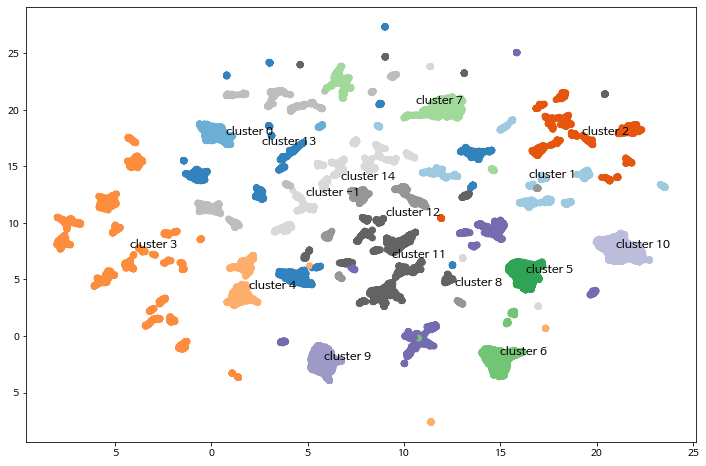

In [85]:
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=labels, cmap='tab20c')

viz_clusters = pd.DataFrame(embedding)
viz_clusters['cluster'] = labels

for row in viz_clusters.groupby('cluster').mean().reset_index().values:
    label = f'cluster {int(row[0])}'
    plt.annotate(label, (row[1], row[2]), textcoords="offset points", fontsize=12,  xytext=(25,0), ha='center') 

In [86]:
cust['cluster_ae'] = labels
cust.columns

Index(['cust', '연간구매금액2', '연간구매금액3', '연간구매금액6', '연간구매금액236', '유통평균주기',
       '제휴평균주기', 'Lpay평균주기', '총합평균주기', 'ma_fem_dv', 'ages', 'zon_hlv',
       'Top5상품', 'Top5상품금액', 'num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02',
       'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06',
       'L00', 'L01', 'how_many_cop', 'online_friendly', 'cltv', 'pur6_bin',
       'cluster_ae'],
      dtype='object')

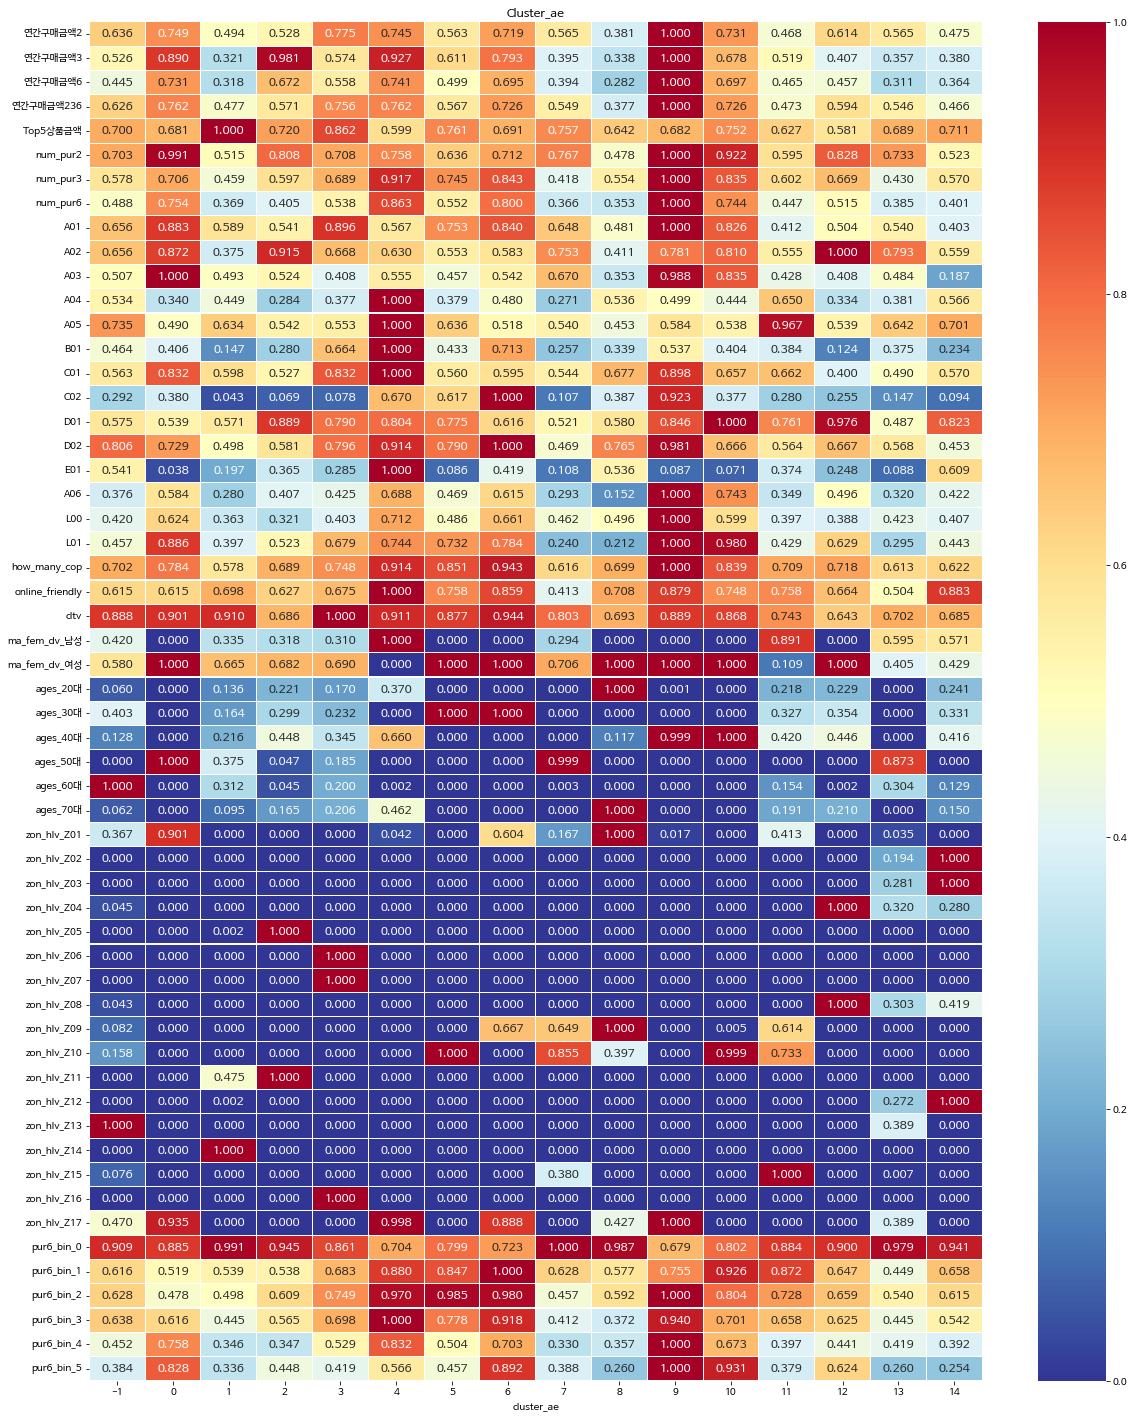

In [87]:
cust = pd.get_dummies(cust, columns=['ma_fem_dv', 'ages', 'zon_hlv', 'pur6_bin'])
temp = cust.groupby(['cluster_ae']).mean()

cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)

plt.figure(figsize = (20, 25))
annot_kws = {'fontsize':12}
sns.heatmap(mean_table,
           annot=True,
           fmt='.3f',
           linewidths=0.1,
           annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.title('Cluster_ae')
plt.show()

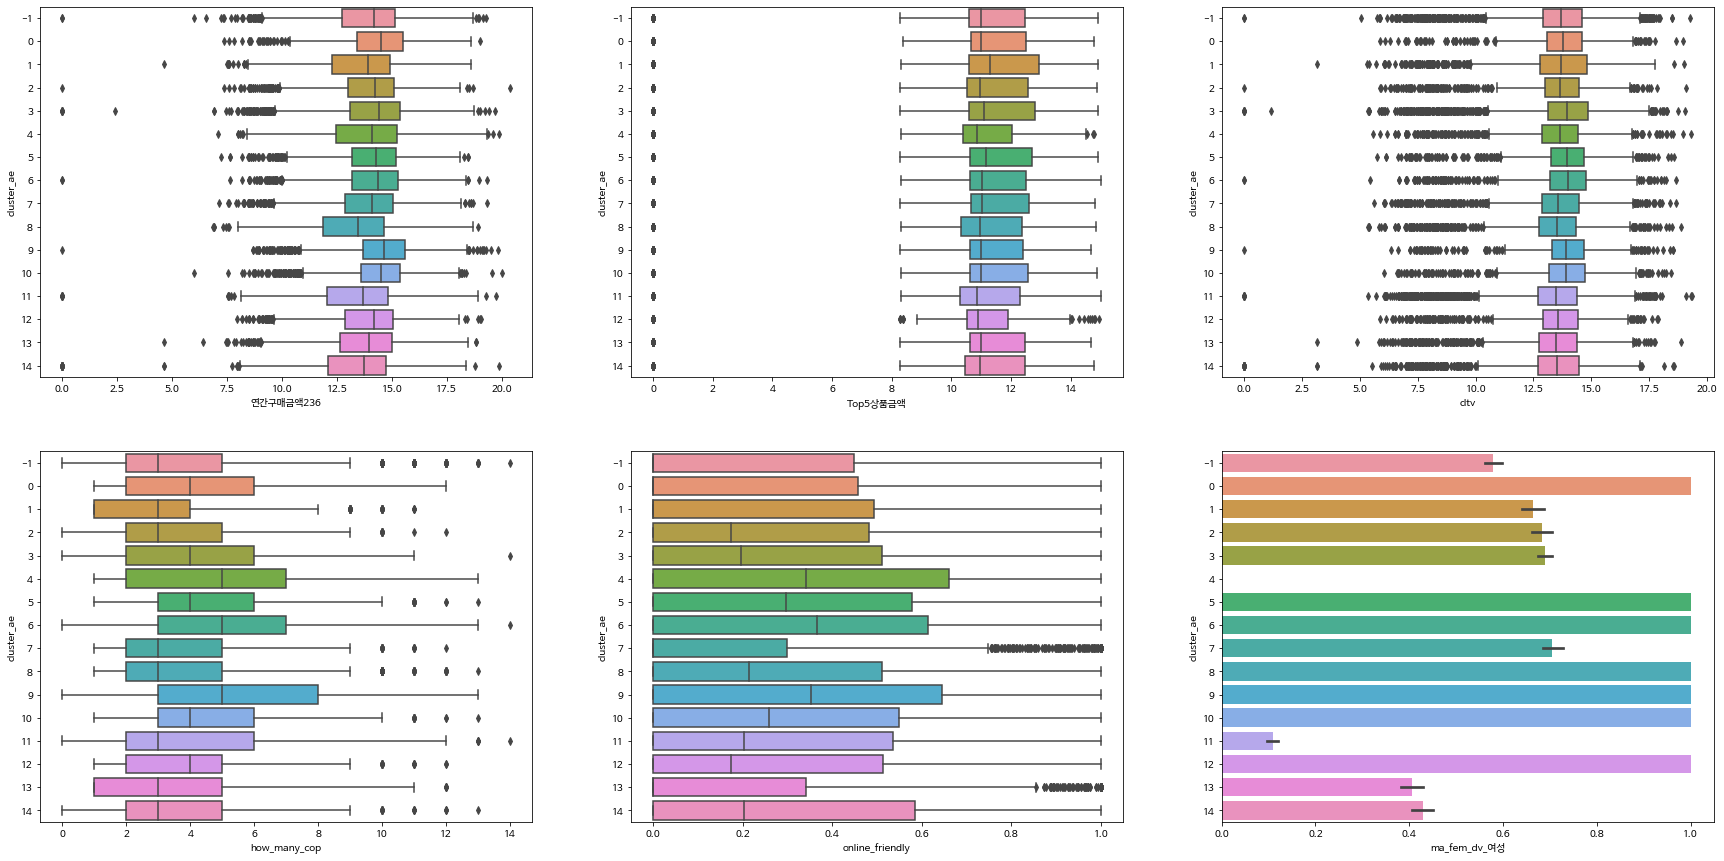

In [88]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster_ae', '연간구매금액236', 'cltv', 'Top5상품금액', 'online_friendly', 'how_many_cop', 'ma_fem_dv_여성']]
#cust.loc[cust.cluster_pur==1, ['cust', '유통평균주기', '제휴평균주기', 'Lpay평균주기', '총합평균주기', 'Top5상품']]
df.연간구매금액236 = np.log1p(df.연간구매금액236)
#df.online_friendly = np.sin(np.pi*df.online_friendly/2)
# df.online_friendly = np.sqrt(df.online_friendly)
df.online_friendly = np.cbrt(df.online_friendly)
df.cltv = np.log1p(df.cltv)
df.Top5상품금액 = np.log1p(df.Top5상품금액)

sns.boxplot(data=df, y='cluster_ae', x='연간구매금액236', orient='h', ax=ax1)
sns.boxplot(data=df, y='cluster_ae', x='Top5상품금액', orient='h', ax=ax2)
sns.boxplot(data=df, y='cluster_ae', x='cltv', orient='h', ax=ax3)
sns.boxplot(data=df, y='cluster_ae', x='how_many_cop', orient='h', ax=ax4)
sns.boxplot(data=df, y='cluster_ae', x='online_friendly', orient='h', ax=ax5)
sns.barplot(data=df, y='cluster_ae', x='ma_fem_dv_여성', orient='h', ax=ax6)

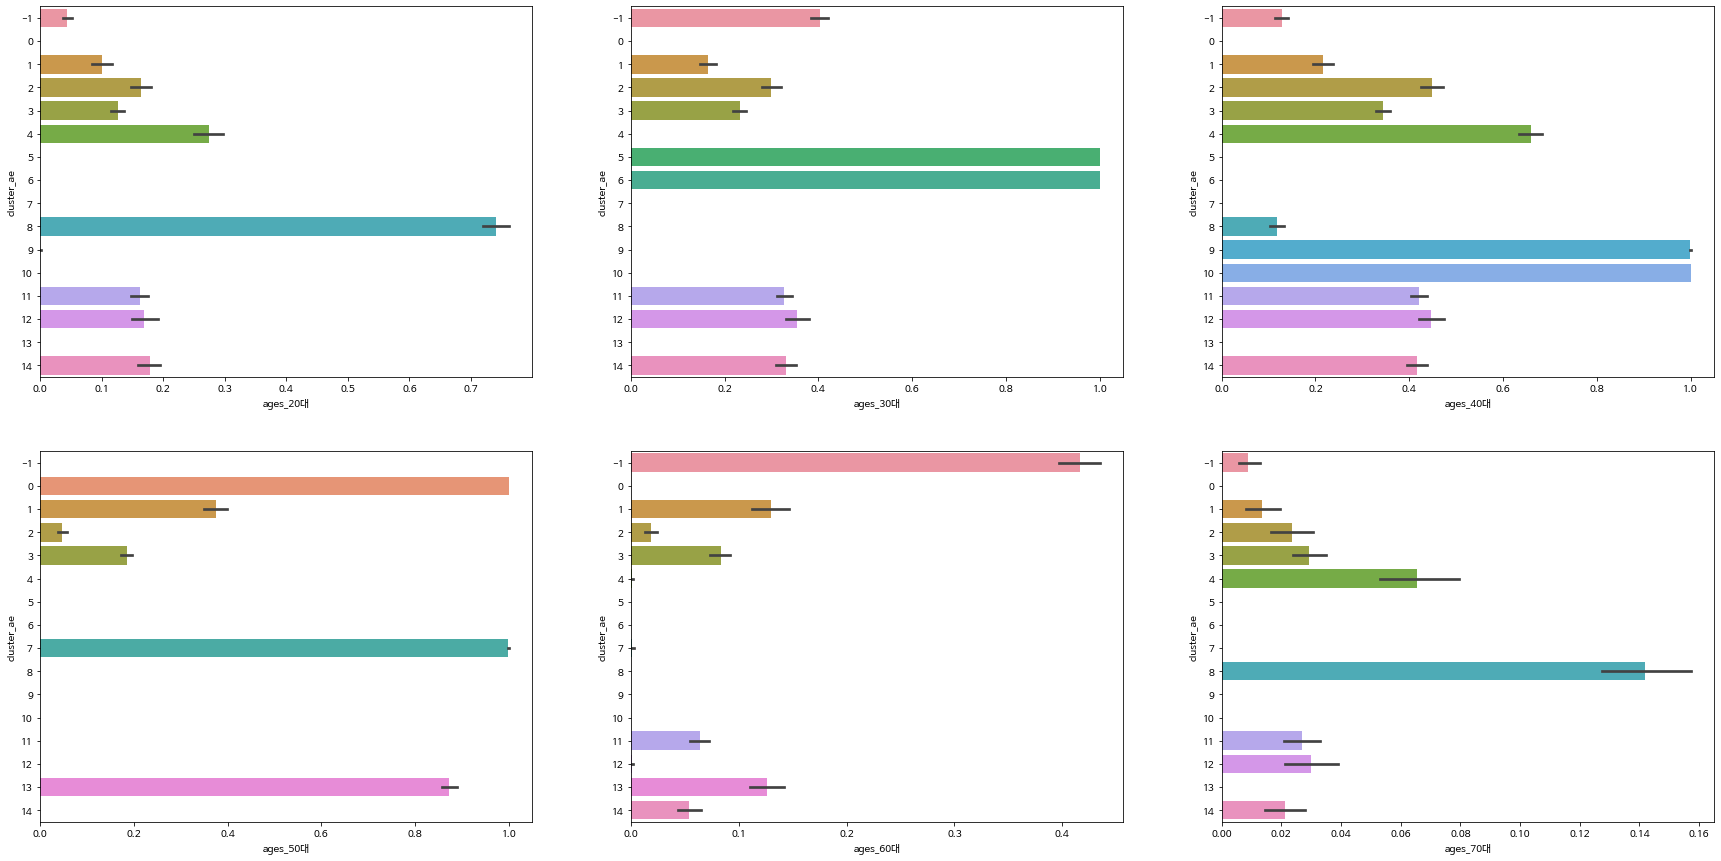

In [89]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster_ae', 'ages_20대', 'ages_30대', 'ages_40대', 'ages_50대', 'ages_60대', 'ages_70대']]

sns.barplot(data=df, y='cluster_ae', x='ages_20대', orient='h', ax=ax1)
sns.barplot(data=df, y='cluster_ae', x='ages_30대', orient='h', ax=ax2)
sns.barplot(data=df, y='cluster_ae', x='ages_40대', orient='h', ax=ax3)
sns.barplot(data=df, y='cluster_ae', x='ages_50대', orient='h', ax=ax4)
sns.barplot(data=df, y='cluster_ae', x='ages_60대', orient='h', ax=ax5)
sns.barplot(data=df, y='cluster_ae', x='ages_70대', orient='h', ax=ax6)

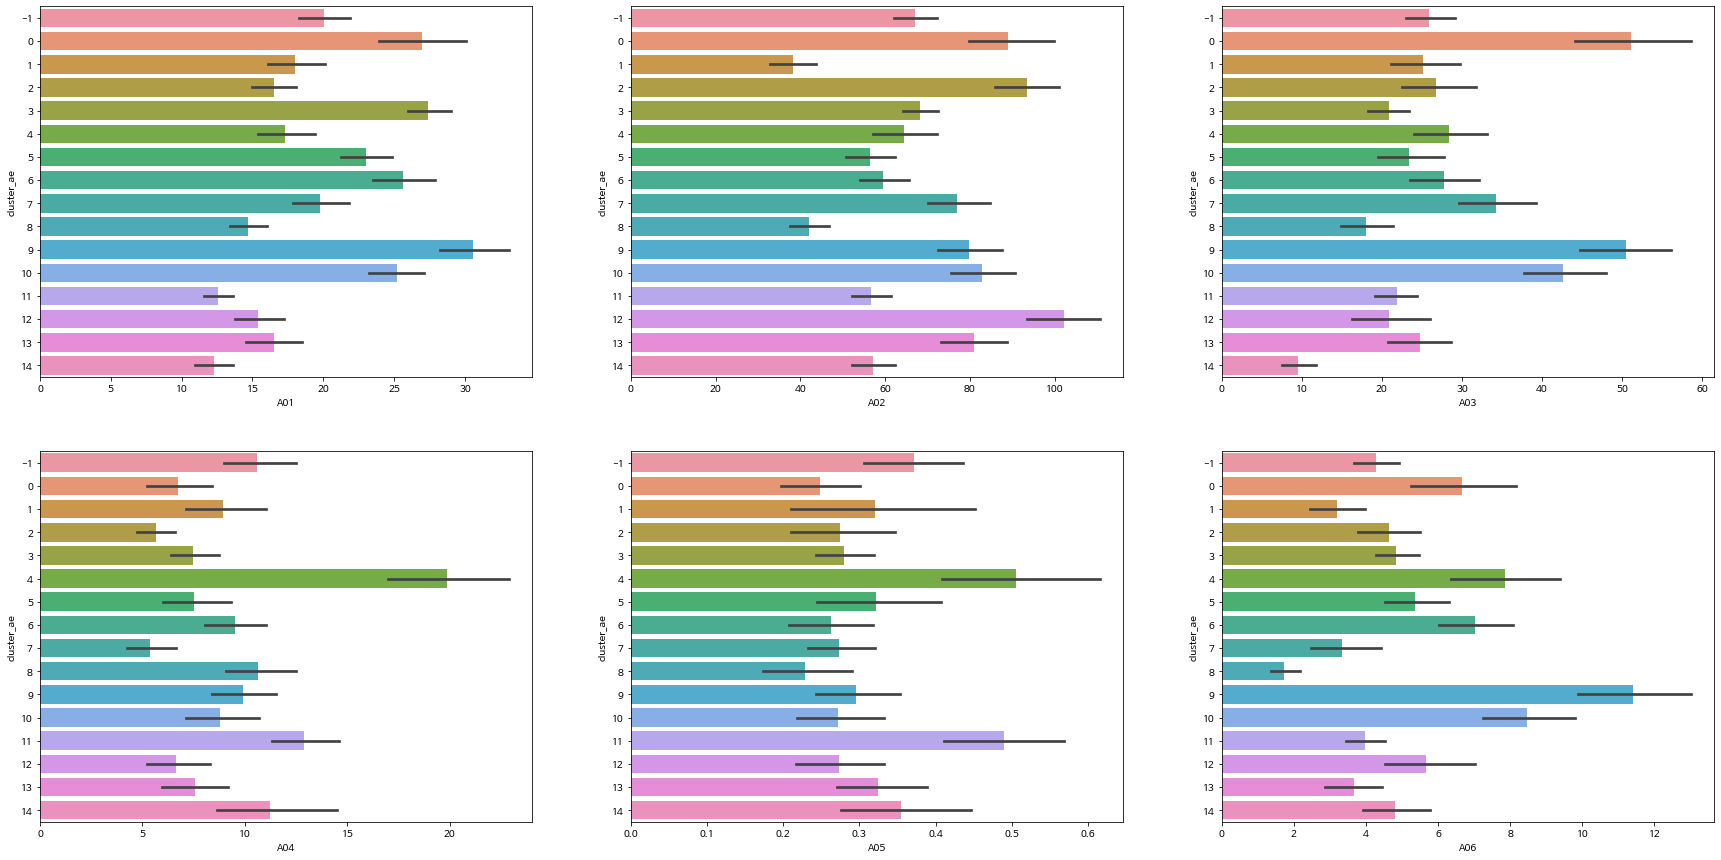

In [90]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,15)

df = cust[['cust', 'cluster_ae', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06']]

sns.barplot(data=df, y='cluster_ae', x='A01', orient='h', ax=ax1)
sns.barplot(data=df, y='cluster_ae', x='A02', orient='h', ax=ax2)
sns.barplot(data=df, y='cluster_ae', x='A03', orient='h', ax=ax3)
sns.barplot(data=df, y='cluster_ae', x='A04', orient='h', ax=ax4)
sns.barplot(data=df, y='cluster_ae', x='A05', orient='h', ax=ax5)
sns.barplot(data=df, y='cluster_ae', x='A06', orient='h', ax=ax6)

## 추천 시스템을 위한 클러스터 생성

In [91]:
X_reduced = learn_manifold(X_encoded, umap_neighbors=15, umap_dim=int(encoded_dimensions/2))

In [92]:
# this is the data that we need to cluster
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=100,
).fit_predict(X_reduced)

In [93]:
unique, counts = np.unique(labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  -1  615]
 [   0  165]
 [   1  553]
 [   2  173]
 [   3  509]
 [   4  849]
 [   5  298]
 [   6  342]
 [   7  152]
 [   8 1388]
 [   9  150]
 [  10  166]
 [  11  322]
 [  12  592]
 [  13  281]
 [  14  338]
 [  15  187]
 [  16  129]
 [  17 1587]
 [  18  185]
 [  19  433]
 [  20  849]
 [  21  391]
 [  22  117]
 [  23  196]
 [  24  361]
 [  25  274]
 [  26  108]
 [  27  159]
 [  28 1802]
 [  29  150]
 [  30  222]
 [  31  319]
 [  32  154]
 [  33  124]
 [  34  124]
 [  35  160]
 [  36  227]
 [  37  103]
 [  38  113]
 [  39  216]
 [  40  412]
 [  41  163]
 [  42  411]
 [  43 1321]
 [  44  163]
 [  45  421]
 [  46  139]
 [  47  650]
 [  48 1399]
 [  49  788]
 [  50  153]
 [  51 1094]
 [  52  175]
 [  53  142]
 [  54  473]
 [  55 1009]
 [  56  384]
 [  57  242]
 [  58  137]
 [  59  176]
 [  60  137]
 [  61  196]
 [  62  120]
 [  63  327]
 [  64  256]
 [  65  111]
 [  66  203]
 [  67  634]
 [  68  107]
 [  69  334]
 [  70  337]
 [  71  140]
 [  72  240]
 [  73  113]
 [  74  220]
 [  75  209]

In [94]:
#important to note that the clustering was performed on the result of UMAP
# but the 2 dim lowering here (in order to generate the plot - was performed on the result of the encoder only)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X_encoded)

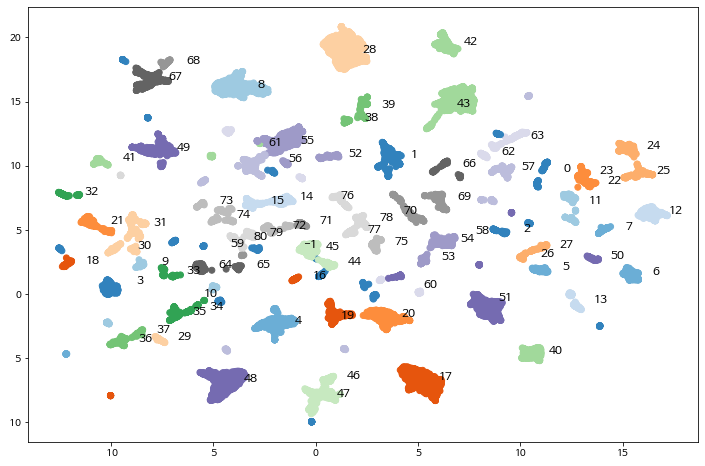

In [95]:
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=labels, cmap='tab20c')

viz_clusters = pd.DataFrame(embedding)
viz_clusters['cluster'] = labels

for row in viz_clusters.groupby('cluster').mean().reset_index().values:
    label = f'{int(row[0])}'
    plt.annotate(label, (row[1], row[2]), textcoords="offset points", fontsize=12,  xytext=(25,0), ha='center') 

In [96]:
cust['cluster_ae'] = labels
cust

,cust,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,유통평균주기,제휴평균주기,Lpay평균주기,총합평균주기,Top5상품,...,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17,pur6_bin_0,pur6_bin_1,pur6_bin_2,pur6_bin_3,pur6_bin_4,pur6_bin_5
0,M000034966,654120.0,3900.0,0.0,658020.0,56 days 20:00:00,1번 구매,0번 구매,48 days 17:08:34.285714285,['채소' '과자' '조미료' '과일' '속옷/양말/홈웨어'],...,0,0,0,0,1,0,0,0,0,0
1,M000136117,28496031.0,252500.0,1137501.0,28748531.0,12 days 09:55:51.724137931,20 days 22:17:08.571428571,106 days 16:00:00,8 days 04:21:49.090909090,['여성의류' '침구/수예' '패션잡화' '남성의류' '세제/위생'],...,0,0,0,0,0,0,1,0,0,0
2,M000201112,53120.0,0.0,0.0,53120.0,42 days 00:00:00,0번 구매,0번 구매,42 days 00:00:00,['대용식' '과자' '음료' '조리식품' '냉장식품'],...,0,0,0,1,1,0,0,0,0,0
3,M000225114,1937700.0,316200.0,0.0,2253900.0,8 days 05:11:21.081081081,53 days 06:00:00,0번 구매,7 days 05:42:51.428571428,['과자' '냉장식품' '조리식품' '과일' '채소'],...,0,0,0,1,1,0,0,0,0,0
4,M000261625,6052700.0,23250.0,0.0,6075950.0,16 days 00:00:00,1번 구매,0번 구매,16 days 00:00:00,['화장품/뷰티케어' '테넌트/음식점' '퍼스널케어' '모바일' '속옷/양말/홈웨어'],...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29904,M915138788,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,0번 구매,...,0,0,0,0,1,0,0,0,0,0
29905,M931112452,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,0번 구매,...,0,0,0,0,1,0,0,0,0,0
29906,M937793665,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,0번 구매,...,0,0,0,0,1,0,0,0,0,0
29907,M960942132,0.0,0.0,0.0,0.0,0번 구매,0번 구매,0번 구매,0번 구매,0번 구매,...,0,0,0,0,1,0,0,0,0,0


In [97]:
cust.cluster_ae.value_counts()

28    1802
17    1587
48    1399
8     1388
43    1321
      ... 
73     113
65     111
26     108
68     107
37     103
Name: cluster_ae, Length: 82, dtype: int64